In [5]:
#Summary Statisics 
#Team : ASK

import pandas as pd
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
from nltk import WordNetLemmatizer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
dataset=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [6]:
# onlineorder=dataset[['online_order']]
# location=dataset[['location']]
# restype=dataset[['rest_type']]
# cuisines=dataset[['cuisines']]
# cost=dataset[['approx_cost(for two people)']]
# bigarea=dataset[['listed_in(city)']]
# rating=dataset[['rate']]
# name=dataset[['name']]
# votes=dataset[['votes']]


# needed=dataset[['name','online_order','rate','votes','location','rest_type','cuisines','approx_cost(for two people)','listed_in(city)']]
# #print(len(needed))
# k=list(dataset.name)

# print(len(k))

In [7]:
# #print(len(set(needed['name'])))
# noduplicates=[]
# rowindex=[]
# #print(name.loc[10])
# d=dict()
# for i in range(0,len(needed)):
#     key1=needed.iloc[i]['name']
#     key2=needed.iloc[i]['location']
#     key3=(key1,key2)
#     if key3 not in d:
#         d[key3]=1
#         rowindex.append(i)
#     else:
#         d[key3]+=1
# print(len(rowindex))
    



    



        



In [8]:
#final=needed.ix[rowindex]

In [9]:
#final

In [10]:
# print(set(final['rate']))  #nan,NEW,-
# a="Cupcake Bliss"
# a in k

In [11]:
############################################
#Reading the required columns into seperate lists
onlineorder=list(dataset.online_order)
location=list(dataset.location)
restype=list(dataset.rest_type)
cuisines=list(dataset.cuisines)
ok='approx_cost(for two people)'
cost=list(dataset[ok])
ok1='listed_in(city)'
bigarea=list(dataset[ok1])
rating=list(dataset.rate)
name=list(dataset.name)
votes=list(dataset.votes)
reviews_list=list(dataset.reviews_list)
print(len(onlineorder),len(rating),len(bigarea),len(name),len(location))



51717 51717 51717 51717 51717


In [12]:
namenew=[]
d={}
row=[]
locationnew=[]
onlineordernew=[]
cuisinesnew=[]
bigareanew=[]
costnew=[]
restypenew=[]
ratingnew=[]
votesnew=[]
review_listnew=[]

#The dataset has many duplicate entries. To remove this, we group the restaurant with area and eleiminate the duplicates because a small area has very less chances of having
# same restaurant.

for i in range(len(name)):
    k,k1=name[i],location[i]
    t=(k,k1)
    if t not in d:
        d[t]=1
        namenew.append(name[i])
        locationnew.append(location[i])
        row.append(i)
        onlineordernew.append(onlineorder[i])
        cuisinesnew.append(cuisines[i])
        costnew.append(cost[i])
        bigareanew.append(bigarea[i])
        ratingnew.append(rating[i])
        restypenew.append(restype[i])
        votesnew.append(votes[i])
        review_listnew.append(reviews_list[i])
        

In [13]:
#set(ratingnew)  #nan,NEW,-         :::::: NEW ->0.0 ; nan-median,
# set(costnew)   #nan --- 
#set(restypenew)  #nan   ---- unavailable


In [14]:
#print(set(votesnew))
        

In [15]:
#cleaning ratingnew for nan,NEW,-   
import numpy as np
import math
med=[]
for j in ratingnew:
    j=str(j)
    if "/" in j:
        y=j.split('/')
        #print(y)
        med.append(float(y[0]))
#print(med)
#med=[4.1, 4.1, 3.8, 3.7, 3.8, 3.8, 3.6, 4.6, 4.0, 4.2, 4.1, 4.2, 4.2, 4.0, 3.8, 3.9, 3.8, 3.9, 3.1, 3.0, 3.7, 3.6, 3.6, 3.7, 3.2, 3.8, 3.3, 3.3, 3.8, 4.0, 2.8, 3.9, 3.9, 4.2, 3.9, 2.8, 4.2, 4.4, 4.0, 3.8, 3.9, 3.9, 3.9, 3.8, 3.6, 4.0, 3.7, 3.1, 3.7, 4.1, 4.3, 4.0, 4.0, 3.9, 3.8, 4.2, 3.6, 3.7, 4.2, 3.6, 3.8, 4.0, 3.7, 4.1, 3.6, 4.1, 3.8, 3.2, 3.6, 4.1, 0.0, 2.9, 3.6, 0.0, 4.1, 3.6, 3.7, 3.8, 3.8, 4.2, 3.5, 3.8, 4.0, 4.4, 3.5, 3.5, 3.7, 3.2, 2.6, 3.3, 3.8, 3.7, 3.7, 3.8, 3.5, 3.7, 3.5, 3.8, 3.5, 3.4, 3.2, 3.2, 3.1, 3.4, 3.1, 4.1, 3.3, 3.1, 3.3, 2.9, 3.3, 4.0, 3.0, 3.9, 4.1, 3.8, 3.8, 3.8, 4.1, 3.8, 4.1, 3.7, 3.9, 3.0, 3.7, 3.3, 3.3, 3.6, 3.3, 4.6, 4.1, 4.1, 3.7, 3.2, 4.0, 3.7, 3.5, 3.8, 3.8, 4.2, 3.6, 3.0, 4.1, 3.8, 3.1, 3.9, 4.5, 4.1, 3.6, 3.5, 3.9, 3.9, 3.9, 4.3, 3.8, 3.9, 4.2, 3.6, 3.8, 3.3, 3.9, 3.4, 3.9, 3.8, 3.8, 3.6, 4.1, 4.2, 3.5, 2.5, 4.1, 4.1, 3.9, 3.6, 3.6, 3.2, 3.1, 3.1, 4.3, 3.9, 4.3, 3.8, 3.9, 3.0, 3.6, 2.8, 3.6, 4.4, 3.8, 3.8, 3.6, 3.9, 3.6, 3.7, 3.6, 3.8, 3.4, 3.3, 3.5, 3.4, 3.7, 2.9, 3.7, 3.5, 3.7, 2.9, 4.1, 3.2, 3.8, 3.8, 3.8, 3.8, 3.5, 3.7, 4.0, 3.6, 3.9, 2.5, 3.4, 3.2, 3.9, 3.8, 4.1, 3.2, 3.6, 3.7, 3.9, 3.9, 4.1, 3.1, 3.7, 4.2, 4.0, 4.3, 3.7, 3.1, 3.9, 3.3, 4.3, 2.6, 3.9, 4.2, 3.9, 3.8, 4.2, 3.9, 3.6, 3.6, 3.6, 4.0, 3.7, 4.1, 2.6, 3.4, 2.8, 3.9, 3.8, 4.0, 4.2, 4.0, 3.5, 3.0, 3.7, 3.6, 3.1, 3.9, 3.9, 3.6, 3.4, 3.8, 3.6, 3.8, 3.5, 3.8, 3.2, 3.7, 3.8, 4.1, 4.1, 3.4, 3.7, 4.0, 3.1, 3.5, 3.8, 3.7, 3.0, 3.7, 3.6, 3.2, 3.7, 3.4, 3.6, 3.6, 3.0, 3.7, 3.5, 3.6, 4.1, 3.5, 3.7, 3.7, 3.8, 2.7, 3.6, 3.2, 3.8, 3.7, 3.6, 3.1, 3.0, 3.4, 3.0, 2.9, 3.9, 4.1, 3.5, 3.4, 3.6, 3.5, 3.8, 3.8, 3.7, 3.8, 3.7, 3.3, 3.4, 3.5, 3.3, 3.4, 3.8, 3.7, 2.9, 3.4, 3.6, 4.0, 3.9, 4.1, 3.7, 3.9, 3.9, 4.0, 3.6, 3.7, 4.0, 3.2, 3.5, 4.0, 3.9, 3.5, 3.5, 3.8, 3.7, 3.8, 4.1, 4.1, 3.7, 3.0, 3.2, 3.8, 3.7, 3.1, 3.0, 3.7, 3.7, 3.3, 3.3, 3.8, 3.4, 3.5, 3.5, 3.2, 3.1, 3.6, 3.3, 3.4, 3.9, 3.7, 2.8, 3.3, 3.5, 3.4, 3.6, 3.3, 3.4, 4.2, 4.0, 3.9, 3.5, 4.2, 3.4, 4.2, 3.3, 3.8, 3.7, 4.1, 3.9, 4.0, 4.1, 3.3, 3.6, 3.4, 4.3, 3.8, 4.2, 4.0, 4.1, 3.8, 3.9, 3.9, 3.2, 3.8, 4.4, 3.8, 3.9, 3.7, 3.9, 3.8, 3.6, 3.4, 3.2, 4.0, 3.7, 3.6, 3.6, 3.6, 2.7, 3.8, 3.9, 3.7, 3.7, 3.4, 3.8, 3.4, 3.6, 3.5, 3.5, 2.7, 4.7, 4.4, 3.8, 3.8, 3.9, 3.5, 3.8, 3.6, 3.5, 3.4, 3.0, 3.5, 4.1, 3.3, 3.4, 3.5, 3.4, 3.6, 3.8, 3.2, 3.2, 3.0, 3.1, 3.3, 3.7, 3.6, 3.0, 4.0, 4.2, 4.4, 3.9, 3.8, 2.7, 3.9, 3.9, 4.2, 3.4, 3.7, 3.9, 4.1, 3.8, 4.1, 4.0, 4.0, 3.3, 3.9, 3.8, 4.0, 3.3, 3.2, 3.8, 3.2, 3.9, 3.6, 3.2, 4.4, 4.2, 4.3, 3.3, 3.1, 4.7, 4.3, 4.1, 4.1, 3.9, 3.8, 4.0, 4.0, 3.3, 2.7, 3.0, 3.8, 4.0, 3.9, 3.7, 3.7, 3.9, 3.9, 3.9, 3.6, 3.8, 3.9, 3.6, 3.9, 3.6, 2.7, 3.6, 3.3, 3.7, 4.1, 4.0, 3.9, 4.1, 4.1, 4.4, 3.7, 3.7, 3.7, 3.6, 2.6, 3.4, 3.4, 3.7, 2.7, 3.2, 4.5, 3.7, 3.8, 3.6, 3.8, 4.1, 4.0, 3.4, 3.6, 3.7, 2.9, 4.5, 4.1, 3.9, 3.6, 4.1, 3.8, 3.3, 4.0, 4.1, 4.0, 4.1, 3.9, 4.0, 3.6, 2.9, 3.1, 4.0, 3.9, 3.9, 3.9, 3.3, 4.1, 3.3, 3.6, 3.9, 3.9, 4.4, 2.6, 3.9, 3.4, 3.7, 4.0, 3.9, 3.4, 3.8, 3.6, 3.2, 3.6, 2.7, 3.4, 3.6, 3.5, 3.9, 3.7, 4.1, 3.5, 3.1, 3.2, 3.9, 3.7, 3.6, 2.9, 3.4, 4.0, 3.4, 3.8, 4.0, 4.0, 3.9, 4.0, 3.7, 3.5, 4.2, 3.3, 3.4, 3.7, 3.6, 2.9, 3.5, 3.8, 4.0, 4.0, 3.9, 3.5, 3.9, 3.8, 3.8, 3.2, 4.0, 3.5, 3.6, 3.5, 3.9, 4.2, 3.9, 3.3, 4.1, 3.6, 3.2, 3.9, 3.7, 3.7, 3.6, 4.6, 3.9, 3.9, 3.2, 3.3, 3.9, 3.9, 3.6, 3.5, 3.5, 3.9, 4.1, 3.8, 3.7, 3.9, 3.9, 4.0, 3.7, 3.2, 4.1, 3.8, 3.7, 3.9, 3.0, 4.0, 3.9, 3.9, 3.9, 4.1, 3.9, 4.1, 2.5, 3.9, 4.2, 3.7, 3.8, 4.0, 3.4, 3.8, 3.1, 3.8, 3.1, 4.0, 3.4, 3.6, 3.5, 3.9, 4.2, 3.1, 3.7, 3.7, 3.1, 3.8, 4.1, 3.4, 3.1, 3.5, 3.7, 3.7, 4.0, 4.2, 3.9, 3.7, 3.6, 3.6, 4.0, 3.0, 3.2, 4.0, 3.2, 4.0, 3.7, 3.1, 3.7, 3.9, 3.7, 3.4, 3.8, 4.0, 3.0, 3.8, 3.7, 3.6, 3.7, 3.8, 3.9, 2.6, 3.4, 3.7, 3.8, 3.6, 4.2, 3.6, 3.1, 3.1, 4.0, 3.3, 3.5, 4.4, 4.0, 4.2, 3.7, 3.5, 3.7, 4.4, 4.0, 2.9, 4.0, 3.9, 4.0, 3.6, 3.9, 4.2, 4.1, 3.5, 2.9, 3.5, 3.9, 3.0, 3.9, 3.8, 3.2, 4.0, 3.0, 3.5, 3.5, 3.4, 4.3, 3.9, 3.5, 3.8, 4.1, 3.6, 4.2, 3.9, 3.6, 3.9, 3.1, 3.1, 3.8, 3.8, 3.6, 3.2, 3.8, 4.2, 3.7, 3.9, 3.1, 3.3, 3.2, 3.5, 3.2, 4.2, 3.8, 2.8, 3.3, 2.9, 3.9, 3.9, 4.0, 4.0, 3.8, 3.5, 3.6, 3.3, 3.5, 3.9, 3.6, 3.0, 3.5, 3.6, 3.6, 3.6, 3.7, 3.7, 3.8, 3.7, 4.2, 3.7, 3.3, 4.1, 3.7, 3.5, 3.1, 3.1, 3.1, 3.0, 3.7, 3.0, 3.0, 2.6, 3.5, 4.2, 3.4, 3.1, 4.0, 3.7, 3.3, 4.3, 4.1, 4.0, 3.7, 3.3, 4.1, 4.0, 3.9, 3.8, 3.3, 3.7, 3.5, 3.6, 3.2, 3.7, 3.7, 3.1, 3.6, 4.1, 3.4, 3.5, 3.0, 3.3, 4.0, 3.5, 3.6, 4.4, 3.4, 3.2, 3.6, 3.2, 3.9, 3.6, 3.5, 3.5, 3.7, 4.2, 3.6, 2.8, 4.0, 3.9, 3.9, 3.3, 3.9, 3.5, 3.3, 3.1, 3.6, 3.7, 3.3, 3.1, 3.1, 3.7, 2.7, 3.1, 3.3, 3.9, 3.4, 3.4, 3.4, 3.3, 3.4, 3.6, 3.6, 3.9, 3.5, 3.6, 3.4, 3.4, 3.5, 3.4, 4.0, 3.4, 3.8, 3.6, 3.4, 3.2, 4.1, 3.6, 3.5, 3.6, 3.7, 3.8, 3.8, 3.1, 3.2, 3.2, 3.4, 3.4, 3.0, 2.9, 3.7, 3.5, 3.3, 3.1, 3.3, 4.3, 3.3, 4.1, 3.4, 3.8, 3.9, 2.9, 3.8, 3.4, 3.1, 4.1, 3.4, 4.2, 3.4, 3.1, 2.9, 3.7, 3.7, 3.7, 4.0, 3.6, 4.0, 3.6, 3.2, 3.9, 4.1, 3.4, 3.8, 3.3, 3.0, 3.8, 2.9, 3.7, 3.8, 3.0, 3.0, 3.2, 3.7, 3.8, 3.2, 4.3, 4.0, 3.9, 3.5, 3.5, 3.4, 3.5, 4.0, 3.7, 3.7, 2.6, 3.6, 3.2, 3.6, 3.4, 3.7, 3.3, 3.6, 2.9, 3.3, 2.6, 3.8, 4.0, 3.6, 3.3, 3.8, 3.6, 3.4, 3.0, 3.2, 3.2, 2.8, 3.3, 3.6, 3.6, 3.3, 3.6, 4.1, 3.4, 4.0, 3.5, 3.1, 3.3, 4.1, 4.1, 3.3, 3.2, 3.4, 2.9, 3.4, 3.0, 3.4, 2.8, 3.7, 3.4, 3.4, 3.3, 3.5, 3.1, 4.0, 3.7, 3.5, 2.4, 3.0, 3.0, 3.8, 3.1, 3.4, 3.7, 3.3, 2.9, 3.3, 3.3, 2.8, 3.4, 3.3, 2.9, 3.1, 3.6, 3.6, 3.2, 3.9, 2.9, 3.3, 2.9, 3.3, 3.6, 2.7, 3.1, 2.2, 3.5, 3.3, 2.4, 3.5, 3.2, 3.3, 2.9, 3.3, 3.3, 3.2, 3.5, 3.3, 3.7, 3.5, 2.4, 3.0, 3.1, 4.0, 3.8, 3.7, 3.8, 3.2, 2.3, 3.9, 3.9, 3.7, 4.0, 3.6, 3.4, 3.5, 3.6, 3.0, 3.0, 3.7, 2.9, 3.7, 3.7, 3.2, 3.2, 3.4, 3.6, 3.7, 3.1, 4.1, 2.9, 3.4, 3.4, 2.8, 4.2, 3.7, 4.1, 3.8, 3.7, 4.1, 3.8, 3.9, 3.5, 2.9, 3.9, 4.0, 3.7, 3.8, 3.5, 3.4, 3.8, 3.7, 3.9, 3.7, 3.2, 3.1, 3.2, 3.6, 3.8, 3.1, 3.9, 2.9, 3.5, 2.7, 2.6, 3.2, 3.0, 3.2, 3.4, 3.6, 3.7, 2.9, 3.5, 3.6, 3.5, 3.1, 3.0, 3.5, 3.5, 3.7, 3.3, 3.4, 3.9, 3.9, 3.1, 3.7, 3.6, 3.1, 3.0, 3.4, 3.4, 3.3, 3.3, 3.3, 3.6, 3.8, 3.3, 3.6, 3.5, 3.3, 3.1, 2.9, 4.0, 3.9, 3.8, 3.5, 3.6, 3.7, 3.2, 3.4, 3.4, 3.4, 3.7, 3.1, 3.4, 3.6, 3.4, 4.0, 3.6, 2.9, 3.3, 3.3, 3.1, 3.5, 3.8, 2.7, 2.7, 3.7, 2.9, 3.5, 3.6, 3.6, 3.1, 4.1, 3.8, 3.9, 3.3, 3.6, 3.5, 3.4, 3.5, 3.5, 2.8, 3.9, 2.4, 3.2, 3.4, 3.5, 2.9, 3.2, 3.2, 3.4, 3.2, 3.5, 3.3, 3.2, 2.7, 3.2, 3.5, 2.4, 3.4, 4.5, 4.3, 4.6, 3.9, 4.0, 3.8, 3.7, 2.9, 3.8, 3.4, 2.3, 2.8, 3.2, 3.3, 2.9, 3.2, 4.0, 2.6, 3.2, 3.8, 4.1, 3.8, 3.8, 3.8, 4.3, 4.1, 4.6, 2.8, 4.3, 4.2, 4.1, 4.2, 4.2, 4.1, 4.2, 4.1, 3.8, 3.8, 3.6, 4.0, 3.2, 2.9, 3.4, 3.7, 2.9, 3.3, 3.7, 4.6, 4.1, 4.2, 4.0, 3.7, 3.7, 4.1, 3.6, 4.3, 3.9, 3.2, 4.0, 3.3, 4.0, 3.9, 3.9, 4.0, 4.1, 4.2, 3.9, 3.9, 4.0, 3.9, 3.7, 4.1, 3.6, 4.2, 4.2, 2.8, 4.5, 3.0, 3.9, 3.6, 4.3, 3.8, 3.6, 4.0, 3.7, 3.9, 3.6, 3.9, 3.6, 4.2, 3.7, 3.6, 3.6, 3.7, 3.9, 3.9, 3.9, 3.8, 3.7, 3.3, 3.6, 3.6, 3.7, 4.1, 3.9, 2.6, 3.6, 3.5, 3.2, 4.4, 4.2, 3.8, 3.4, 3.5, 3.6, 4.4, 3.6, 4.5, 3.7, 3.7, 2.8, 4.2, 2.8, 3.8, 3.9, 3.9, 3.3, 3.9, 4.0, 3.6, 3.5, 3.7, 4.1, 4.0, 3.4, 3.5, 3.6, 4.1, 3.5, 4.1, 3.5, 3.2, 3.4, 3.6, 3.9, 3.6, 4.1, 3.9, 3.4, 3.7, 3.9, 3.7, 3.6, 3.7, 3.9, 3.4, 3.5, 3.9, 3.5, 3.7, 3.8, 3.9, 4.3, 4.1, 4.3, 2.6, 4.1, 3.5, 3.6, 3.3, 3.2, 3.2, 3.1, 3.2, 3.2, 3.3, 3.3, 3.6, 4.1, 3.6, 4.1, 4.2, 4.4, 3.1, 3.8, 3.8, 3.7, 3.5, 4.0, 3.5, 3.6, 3.8, 4.1, 3.1, 3.7, 3.1, 3.3, 3.0, 3.8, 3.3, 3.6, 3.8, 3.2, 3.5, 4.3, 4.0, 3.8, 3.9, 3.6, 3.5, 3.4, 3.0, 3.6, 3.5, 3.0, 3.3, 3.6, 3.5, 3.6, 4.0, 3.8, 3.6, 3.4, 3.7, 3.6, 3.4, 3.3, 3.0, 3.6, 3.2, 3.9, 3.8, 3.4, 3.9, 3.6, 4.2, 4.3, 3.9, 3.7, 4.1, 3.7, 3.8, 3.8, 4.5, 4.4, 4.2, 3.7, 4.1, 3.9, 4.3, 3.6, 3.4, 3.7, 3.6, 4.5, 4.8, 3.8, 3.9, 2.9, 3.7, 2.8, 4.2, 3.7, 3.5, 4.1, 2.7, 3.4, 3.9, 3.7, 3.6, 2.9, 3.7, 3.3, 3.6, 3.2, 3.3, 3.3, 3.3, 4.3, 3.9, 4.0, 4.2, 3.7, 4.4, 3.9, 3.8, 4.2, 3.6, 3.7, 3.7, 4.1, 2.7, 3.8, 3.3, 3.6, 3.2, 3.4, 3.4, 2.8, 3.1, 3.0, 3.2, 3.4, 3.3, 3.3, 3.4, 3.3, 3.9, 4.4, 4.2, 4.1, 4.4, 4.3, 4.0, 3.9, 3.6, 4.1, 3.7, 2.8, 3.0, 3.5, 3.0, 3.8, 4.8, 4.5, 4.7, 4.3, 4.3, 4.7, 3.9, 4.3, 4.0, 4.3, 3.0, 3.9, 3.9, 3.7, 4.0, 3.8, 3.6, 4.0, 3.9, 3.9, 3.6, 3.1, 2.9, 4.0, 3.7, 3.7, 3.0, 3.8, 4.0, 3.6, 4.3, 4.3, 4.3, 3.7, 4.1, 3.9, 4.4, 3.4, 3.9, 4.1, 3.2, 3.8, 2.9, 3.3, 4.3, 4.4, 3.8, 3.5, 3.2, 3.1, 3.9, 2.9, 3.8, 3.7, 4.0, 4.5, 3.8, 4.0, 4.2, 4.2, 3.9, 3.8, 3.8, 3.8, 3.6, 3.7, 3.6, 4.0, 3.8, 3.5, 2.9, 3.9, 3.7, 3.9, 4.0, 3.8, 3.6, 3.0, 4.2, 4.1, 4.0, 4.4, 3.9, 3.8, 3.5, 4.1, 3.8, 4.0, 3.8, 3.2, 3.8, 4.0, 3.7, 3.2, 3.8, 3.4, 3.8, 4.0, 3.5, 4.0, 3.6, 4.1, 3.9, 3.9, 3.6, 3.3, 2.8, 3.3, 3.1, 2.8, 3.7, 3.0, 3.5, 3.9, 2.9, 3.9, 3.8, 3.1, 2.8, 3.9, 3.7, 3.9, 3.4, 4.3, 4.0, 3.8, 4.1, 2.9, 3.5, 4.1, 4.2, 3.7, 3.7, 4.6, 3.9, 3.8, 3.5, 4.3, 2.9, 2.9, 4.3, 2.3, 3.6, 3.3, 3.0, 4.0, 4.9, 3.7, 3.6, 4.5, 4.5, 3.1, 3.5, 3.4, 2.6, 3.5, 3.4, 3.5, 3.4, 3.5, 3.6, 3.6, 3.9, 3.7, 4.1, 4.4, 4.0, 3.8, 3.7, 3.7, 4.4, 3.9, 4.1, 3.2, 3.8, 3.9, 3.8, 3.5, 4.0, 3.6, 3.5, 3.9, 4.0, 3.6, 3.6, 3.8, 3.1, 3.6, 4.3, 3.6, 4.1, 4.4, 3.6, 3.9, 4.0, 3.6, 3.1, 3.9, 3.4, 4.2, 3.6, 3.8, 3.9, 3.0, 4.2, 3.9, 3.0, 3.9, 3.6, 3.7, 3.4, 3.5, 4.3, 3.9, 3.5, 3.4, 4.1, 3.9, 4.0, 3.9, 3.3, 3.2, 3.3, 3.7, 2.9, 2.4, 3.8, 3.6, 3.8, 3.5, 3.6, 3.7, 3.4, 4.1, 3.0, 3.8, 2.9, 4.0, 4.2, 4.0, 3.0, 3.2, 3.5, 2.9, 4.3, 4.0, 3.3, 4.0, 3.7, 3.7, 3.2, 3.6, 2.9, 3.3, 3.8, 3.2, 3.9, 4.1, 3.4, 4.0, 3.2, 3.9, 3.4, 3.5, 3.3, 4.4, 3.5, 3.1, 2.6, 4.0, 3.4, 3.2, 3.8, 2.8, 3.2, 3.7, 3.2, 3.7, 3.3, 3.7, 3.6, 4.0, 4.4, 3.9, 4.4, 4.1, 4.0, 3.7, 4.2, 3.8, 2.9, 2.9, 3.7, 4.1, 4.0, 3.7, 3.2, 3.8, 3.6, 3.1, 3.5, 3.1, 2.9, 4.2, 3.0, 2.9, 3.1, 3.6, 3.8, 3.6, 3.2, 3.6, 3.7, 4.1, 4.1, 3.0, 4.3, 4.0, 3.8, 3.7, 4.0, 2.9, 3.7, 3.7, 4.2, 3.5, 3.7, 3.7, 3.8, 2.9, 3.6, 3.9, 3.8, 4.2, 3.0, 3.9, 3.5, 3.3, 3.8, 4.0, 3.6, 3.4, 3.1, 3.6, 3.5, 3.8, 4.0, 3.7, 3.2, 3.4, 3.8, 3.8, 3.1, 3.3, 3.6, 3.5, 3.7, 3.6, 2.8, 3.0, 3.7, 4.1, 3.0, 2.8, 3.6, 3.7, 2.6, 3.3, 3.8, 4.3, 3.8, 3.5, 3.7, 3.8, 3.8, 3.2, 2.8, 3.1, 3.8, 3.7, 3.3, 3.6, 3.1, 4.0, 3.6, 3.0, 3.6, 3.0, 3.3, 3.7, 3.4, 3.6, 3.5, 2.7, 3.2, 2.9, 3.1, 3.7, 3.2, 3.7, 3.4, 3.9, 3.2, 3.6, 3.1, 3.7, 3.2, 3.7, 2.3, 3.3, 3.7, 3.6, 3.4, 3.8, 2.8, 3.5, 3.6, 3.9, 3.6, 3.3, 3.5, 3.6, 3.8, 3.7, 3.3, 3.0, 3.5, 3.7, 3.7, 3.0, 3.4, 2.1, 2.7, 3.9, 4.2, 3.7, 3.2, 3.3, 3.2, 3.0, 3.4, 3.3, 3.8, 2.9, 3.5, 3.1, 3.5, 3.4, 3.2, 3.1, 3.0, 2.8, 3.0, 3.6, 3.1, 3.7, 3.2, 3.2, 3.8, 3.6, 3.1, 3.1, 2.9, 4.0, 2.5, 3.2, 3.1, 3.8, 3.9, 3.2, 3.3, 3.8, 3.1, 3.7, 3.5, 3.8, 3.7, 3.0, 3.9, 3.2, 4.3, 4.1, 3.8, 3.8, 3.7, 4.0, 3.7, 3.2, 3.2, 3.7, 4.2, 4.0, 3.8, 3.5, 3.4, 3.5, 3.6, 3.5, 3.8, 3.6, 3.1, 3.6, 3.4, 2.9, 3.4, 3.4, 3.5, 3.2, 3.4, 3.8, 3.1, 2.8, 3.1, 3.1, 3.5, 3.4, 3.1, 3.7, 3.3, 4.2, 3.7, 3.2, 3.7, 3.3, 3.2, 3.3, 4.3, 3.6, 3.6, 3.9, 3.3, 3.9, 4.2, 4.0, 4.1, 4.2, 2.6, 3.4, 3.5, 3.3, 3.3, 2.9, 2.9, 2.7, 3.4, 2.6, 3.6, 3.6, 3.2, 3.1, 3.5, 3.4, 3.6, 3.7, 3.6, 3.6, 3.2, 3.1, 3.3, 3.3, 3.6, 4.4, 4.6, 4.2, 4.1, 4.3, 4.1, 3.5, 2.6, 3.3, 3.9, 3.3, 3.5, 2.2, 3.7, 3.3, 3.5, 2.9, 3.3, 3.8, 4.3, 4.0, 4.0, 2.8, 3.9, 3.6, 4.5, 4.4, 4.0, 4.6, 4.4, 4.3, 4.5, 4.3, 4.4, 4.3, 4.0, 4.3, 3.8, 4.1, 4.2, 4.3, 4.3, 3.9, 4.3, 3.9, 4.3, 3.9, 4.0, 3.9, 3.9, 3.8, 4.2, 4.1, 3.1, 2.8, 3.9, 3.9, 3.0, 3.7, 3.5, 2.9, 3.0, 3.8, 3.7, 3.8, 3.3, 3.8, 2.3, 4.0, 4.2, 3.8, 3.7, 3.1, 3.9, 4.2, 4.3, 4.0, 4.2, 3.8, 3.6, 3.2, 2.8, 3.2, 3.6, 3.6, 4.6, 4.2, 4.5, 4.4, 4.0, 4.3, 4.4, 4.1, 4.3, 4.3, 4.2, 4.3, 4.3, 4.1, 4.1, 4.3, 4.0, 4.1, 3.9, 4.3, 3.9, 3.6, 3.8, 4.0, 4.2, 4.2, 3.4, 3.7, 4.0, 4.1, 4.0, 3.9, 4.2, 3.8, 3.4, 3.9, 3.7, 3.8, 3.0, 3.7, 3.9, 3.8, 3.7, 3.3, 3.6, 3.1, 3.3, 3.8, 4.1, 4.7, 4.3, 3.7, 4.3, 4.2, 3.5, 3.1, 3.5, 4.1, 3.6, 3.9, 4.0, 4.3, 3.8, 4.1, 4.0, 3.9, 3.3, 3.5, 4.1, 4.0, 3.4, 3.8, 4.3, 3.5, 4.3, 3.3, 3.9, 4.2, 4.4, 4.2, 4.0, 3.5, 3.7, 3.5, 3.8, 3.8, 3.3, 4.3, 3.6, 3.6, 3.9, 3.8, 2.7, 4.0, 4.9, 3.8, 4.1, 4.1, 3.8, 4.4, 3.7, 4.1, 3.1, 3.6, 4.2, 3.2, 3.8, 3.4, 4.3, 3.6, 3.5, 4.4, 4.6, 4.3, 3.6, 3.9, 3.6, 3.4, 4.0, 3.9, 4.4, 4.0, 3.9, 3.1, 4.2, 4.3, 3.7, 3.4, 4.0, 4.2, 3.1, 3.7, 3.9, 4.0, 4.3, 3.9, 3.5, 4.1, 4.5, 3.7, 3.9, 4.3, 3.9, 3.6, 4.4, 3.0, 4.0, 3.9, 3.7, 4.1, 3.6, 3.9, 3.9, 4.2, 4.0, 4.0, 3.9, 3.5, 3.5, 3.6, 4.2, 3.8, 3.6, 2.5, 3.8, 4.1, 4.0, 3.9, 4.3, 2.8, 3.5, 4.4, 3.5, 4.2, 3.7, 3.3, 3.5, 4.3, 3.9, 4.1, 3.8, 3.7, 4.0, 3.8, 4.2, 3.5, 3.6, 4.2, 3.7, 3.8, 4.2, 4.0, 3.1, 4.2, 3.9, 3.8, 3.0, 3.1, 4.1, 3.9, 3.3, 4.3, 3.8, 3.3, 3.9, 4.1, 3.8, 3.9, 3.1, 3.5, 4.0, 4.3, 3.9, 3.5, 3.8, 3.2, 4.2, 4.4, 3.9, 3.7, 3.8, 3.7, 3.4, 3.9, 3.9, 2.9, 3.6, 4.2, 3.7, 4.1, 3.5, 4.2, 4.3, 3.7, 4.4, 3.1, 3.4, 3.5, 3.1, 4.1, 3.1, 4.0, 3.2, 3.7, 3.5, 4.3, 3.4, 3.2, 4.0, 2.8, 4.3, 3.9, 3.9, 3.5, 4.1, 3.7, 3.1, 3.7, 4.0, 3.4, 2.8, 2.9, 3.2, 3.2, 3.9, 4.0, 3.8, 3.8, 3.2, 4.1, 3.3, 4.2, 4.0, 4.0, 4.2, 3.7, 4.1, 3.9, 3.5, 2.8, 2.9, 4.0, 4.0, 3.9, 3.5, 3.9, 4.0, 3.5, 3.7, 3.4, 3.8, 3.9, 4.0, 3.9, 4.3, 4.2, 3.7, 4.4, 3.3, 4.1, 3.9, 3.5, 3.7, 3.2, 3.8, 3.4, 4.1, 3.7, 3.5, 2.8, 3.9, 4.4, 3.9, 3.7, 3.4, 3.7, 3.2, 3.8, 4.1, 4.3, 3.7, 3.5, 3.6, 4.1, 3.3, 4.1, 3.8, 3.2, 3.5, 3.5, 3.5, 3.8, 3.1, 3.0, 3.7, 4.1, 4.1, 3.8, 3.0, 3.6, 2.2, 3.5, 2.9, 4.2, 3.9, 3.1, 3.2, 3.8, 3.9, 3.8, 4.0, 3.3, 3.6, 4.0, 4.1, 4.6, 4.4, 4.3, 3.1, 3.5, 3.4, 3.4, 4.1, 4.1, 3.8, 3.9, 3.9, 4.2, 3.9, 4.3, 4.2, 3.5, 4.1, 4.0, 3.4, 3.6, 4.0, 2.9, 3.5, 3.0, 4.1, 3.3, 3.6, 4.0, 4.3, 3.7, 3.0, 4.2, 4.1, 4.1, 3.0, 4.0, 3.4, 4.4, 4.4, 3.1, 3.6, 3.8, 4.0, 3.9, 4.0, 4.1, 4.4, 3.7, 3.4, 3.8, 3.6, 3.3, 3.8, 4.0, 3.8, 3.4, 3.7, 3.6, 3.2, 3.2, 4.2, 2.1, 4.0, 3.2, 4.3, 4.1, 4.0, 3.5, 3.7, 3.6, 3.1, 2.9, 2.8, 3.4, 4.1, 3.1, 4.0, 3.0, 3.8, 3.6, 3.7, 3.3, 3.1, 4.3, 3.2, 3.7, 3.8, 3.6, 3.8, 3.3, 4.4, 4.1, 4.1, 3.9, 3.9, 3.6, 3.5, 4.3, 4.1, 4.3, 4.3, 4.4, 4.1, 3.9, 4.1, 4.3, 4.3, 4.0, 3.9, 3.9, 3.8, 2.7, 3.8, 3.8, 4.0, 3.8, 3.4, 3.9, 4.3, 3.3, 3.7, 3.8, 3.3, 4.0, 4.2, 3.1, 3.2, 3.3, 4.1, 3.2, 3.8, 3.5, 3.6, 3.2, 3.4, 3.1, 3.6, 3.7, 3.7, 3.8, 3.0, 3.5, 3.0, 3.4, 3.8, 3.4, 3.6, 3.3, 3.2, 3.0, 3.4, 2.6, 3.3, 2.8, 3.9, 3.2, 3.4, 3.2, 3.2, 3.0, 3.6, 3.8, 3.2, 3.5, 3.7, 3.2, 3.2, 3.1, 3.3, 3.8, 3.2, 3.5, 3.3, 3.0, 3.5, 3.7, 3.7, 3.7, 4.0, 4.3, 4.5, 3.6, 4.5, 4.1, 4.0, 3.6, 4.0, 4.0, 3.5, 3.7, 3.7, 3.5, 4.0, 3.9, 4.1, 3.6, 3.4, 3.6, 4.0, 2.9, 3.5, 3.5, 3.4, 3.7, 3.3, 3.4, 3.5, 3.5, 3.2, 3.2, 4.1, 3.7, 3.9, 4.1, 4.4, 4.5, 4.5, 4.4, 4.4, 4.2, 4.2, 4.1, 4.0, 3.9, 2.0, 4.0, 3.9, 2.9, 3.7, 3.3, 3.8, 4.0, 2.7, 3.5, 3.1, 3.5, 4.4, 4.7, 4.2, 4.4, 4.6, 4.4, 4.5, 4.5, 4.2, 4.6, 4.3, 4.1, 4.3, 4.2, 4.2, 3.9, 4.3, 4.3, 4.3, 4.6, 4.3, 4.4, 4.2, 4.4, 4.5, 4.5, 4.2, 4.3, 4.3, 4.4, 4.2, 4.1, 4.3, 4.2, 4.1, 4.5, 4.6, 4.1, 4.3, 3.9, 4.2, 4.3, 3.9, 4.0, 4.1, 3.7, 3.9, 3.9, 3.9, 4.3, 4.2, 4.4, 4.4, 4.1, 3.8, 3.9, 4.1, 4.2, 3.9, 4.0, 3.9, 4.0, 4.0, 2.7, 4.2, 3.7, 3.6, 2.5, 3.7, 4.1, 4.0, 3.6, 4.0, 3.8, 4.1, 3.5, 3.9, 4.1, 3.7, 4.0, 3.3, 4.1, 4.2, 4.0, 3.7, 3.5, 4.3, 3.4, 3.8, 3.7, 1.8, 3.9, 3.3, 3.7, 3.4, 3.6, 2.2, 3.3, 3.7, 3.3, 3.3, 3.5, 3.3, 3.8, 3.6, 3.7, 4.5, 4.0, 4.1, 4.0, 4.0, 4.0, 3.9, 3.0, 3.2, 3.6, 3.9, 3.5, 3.7, 3.4, 2.9, 3.9, 3.6, 3.5, 3.5, 3.4, 3.3, 3.9, 3.4, 2.5, 3.5, 3.6, 3.6, 3.1, 3.3, 2.9, 3.2, 3.4, 3.2, 3.2, 3.4, 3.7, 3.7, 3.8, 3.0, 3.2, 3.2, 3.5, 3.1, 3.8, 3.5, 3.2, 3.2, 4.0, 4.0, 4.5, 3.9, 3.9, 3.5, 3.2, 3.6, 3.7, 3.6, 3.2, 3.6, 3.1, 3.3, 3.9, 3.1, 4.2, 4.0, 3.9, 3.9, 3.9, 4.1, 4.1, 4.0, 4.0, 3.9, 3.9, 3.8, 3.8, 3.6, 3.9, 3.5, 3.7, 4.3, 4.2, 3.8, 4.8, 4.9, 4.0, 4.1, 4.1, 4.7, 4.0, 3.9, 4.1, 3.8, 4.2, 4.0, 3.8, 3.5, 3.8, 3.0, 3.6, 3.9, 3.8, 3.5, 2.8, 3.6, 3.7, 3.6, 3.0, 2.6, 2.9, 3.6, 4.2, 4.2, 4.0, 3.2, 4.0, 4.0, 3.4, 2.3, 4.1, 4.5, 4.3, 4.2, 3.7, 3.4, 4.1, 3.1, 2.8, 3.9, 3.5, 3.9, 3.1, 3.6, 3.9, 3.7, 3.6, 2.9, 3.2, 3.2, 3.5, 3.7, 4.0, 4.5, 3.7, 3.5, 3.8, 4.2, 3.4, 3.4, 3.6, 3.8, 3.8, 2.8, 3.7, 4.0, 3.6, 3.5, 3.5, 4.4, 3.2, 3.5, 3.1, 3.7, 3.5, 3.8, 3.7, 3.1, 3.0, 3.6, 3.8, 3.8, 2.8, 3.5, 3.7, 3.5, 3.0, 2.8, 4.0, 3.6, 3.6, 2.9, 3.3, 3.9, 3.0, 3.7, 4.3, 4.4, 4.2, 3.0, 3.4, 3.1, 2.9, 3.0, 3.5, 3.1, 3.0, 3.1, 3.5, 3.3, 3.1, 2.9, 3.4, 2.9, 3.2, 3.6, 3.0, 3.8, 3.9, 3.3, 3.7, 3.7, 4.6, 3.9, 2.6, 3.9, 2.7, 2.8, 2.6, 4.0, 3.1, 3.2, 3.5, 3.6, 4.2, 3.3, 3.1, 3.9, 3.0, 3.0, 3.3, 4.1, 3.1, 4.0, 4.0, 3.8, 4.1, 3.1, 2.4, 3.1, 3.3, 4.2, 3.7, 3.5, 4.1, 3.2, 3.9, 4.1, 4.5, 3.1, 3.7, 3.4, 3.7, 4.0, 3.8, 3.2, 4.0, 3.9, 4.0, 3.9, 3.5, 3.1, 4.0, 3.7, 3.3, 3.1, 4.2, 3.1, 3.9, 3.8, 3.7, 4.5, 3.7, 3.2, 4.1, 2.6, 2.9, 3.6, 4.3, 3.7, 3.8, 3.4, 3.2, 3.3, 3.7, 4.1, 3.8, 3.8, 4.0, 3.7, 3.4, 3.2, 3.3, 3.9, 3.0, 3.4, 2.4, 4.6, 3.0, 3.2, 3.2, 3.3, 2.8, 2.8, 3.6, 4.0, 3.5, 4.7, 3.6, 4.0, 3.4, 2.9, 4.1, 4.5, 3.8, 4.1, 3.0, 3.4, 2.9, 3.3, 3.7, 2.8, 4.0, 3.9, 3.5, 3.9, 4.6, 3.9, 2.9, 3.6, 4.0, 3.2, 4.0, 3.5, 4.1, 4.0, 3.9, 3.3, 4.1, 3.9, 4.0, 3.8, 3.6, 3.6, 4.0, 3.5, 3.9, 3.3, 4.1, 3.9, 3.7, 3.8, 3.6, 3.9, 3.6, 3.5, 4.0, 3.0, 3.8, 4.3, 3.5, 3.3, 3.5, 3.7, 3.4, 3.5, 3.7, 3.6, 2.9, 4.1, 3.8, 3.8, 4.4, 4.7, 3.2, 4.0, 3.3, 3.6, 3.8, 3.6, 3.7, 3.7, 3.2, 3.0, 3.3, 4.3, 3.8, 3.8, 4.3, 3.8, 4.0, 4.1, 4.9, 4.3, 3.3, 3.7, 3.7, 3.8, 3.7, 3.9, 3.6, 2.7, 4.2, 4.1, 3.9, 3.9, 3.9, 3.0, 4.2, 4.2, 4.3, 3.0, 4.1, 3.5, 4.3, 3.4, 4.2, 3.7, 2.9, 3.9, 4.0, 3.6, 3.9, 3.0, 2.4, 4.0, 3.7, 3.3, 3.9, 4.0, 2.8, 3.6, 3.5, 3.7, 3.7, 3.9, 4.2, 2.7, 3.6, 3.8, 3.3, 3.7, 4.0, 3.4, 4.1, 3.4, 3.3, 3.9, 3.9, 4.0, 3.7, 3.2, 2.9, 2.8, 3.4, 3.6, 3.8, 3.7, 3.6, 3.5, 2.8, 3.4, 2.1, 3.3, 3.6, 3.5, 3.0, 3.4, 3.2, 3.7, 3.4, 3.6, 3.2, 3.6, 3.2, 3.1, 3.2, 3.4, 3.7, 3.4, 3.4, 3.4, 2.6, 2.8, 3.0, 3.4, 3.4, 3.2, 3.5, 3.4, 3.5, 3.0, 3.4, 3.4, 3.4, 3.2, 3.4, 3.8, 3.5, 3.9, 3.8, 2.8, 3.7, 2.8, 3.1, 3.6, 3.6, 3.8, 3.4, 2.9, 3.4, 3.1, 3.9, 3.9, 3.7, 3.0, 3.6, 3.4, 3.9, 3.5, 4.0, 3.1, 3.4, 3.6, 3.8, 3.4, 3.0, 3.8, 3.6, 3.6, 3.3, 4.1, 3.6, 3.8, 3.7, 3.7, 3.7, 3.8, 3.9, 3.8, 3.7, 3.1, 3.2, 2.7, 2.8, 4.0, 3.2, 3.6, 3.1, 3.8, 3.5, 3.8, 3.3, 2.8, 3.4, 3.7, 2.7, 3.5, 3.1, 3.7, 3.9, 3.3, 3.6, 2.8, 3.1, 3.5, 3.1, 3.2, 3.9, 3.6, 4.2, 3.1, 3.8, 3.8, 3.2, 3.7, 3.0, 3.2, 2.6, 3.2, 3.8, 3.8, 3.3, 3.4, 3.8, 3.3, 3.6, 3.2, 3.3, 3.5, 3.6, 3.5, 3.9, 3.3, 4.0, 3.7, 3.0, 3.4, 3.3, 3.6, 3.6, 3.4, 3.7, 3.6, 3.4, 3.5, 3.5, 2.7, 3.6, 3.5, 3.4, 3.2, 4.0, 3.9, 3.5, 3.8, 3.5, 3.8, 3.1, 4.0, 3.9, 3.0, 3.2, 3.6, 3.0, 3.6, 3.4, 4.2, 3.5, 3.5, 2.2, 2.8, 3.2, 3.7, 3.7, 3.6, 3.6, 3.0, 2.9, 2.8, 3.6, 3.9, 3.3, 2.9, 3.4, 3.6, 3.8, 2.1, 3.7, 3.8, 3.5, 3.3, 3.6, 3.3, 3.2, 3.4, 3.4, 3.3, 3.4, 3.6, 2.8, 3.6, 3.6, 3.4, 3.7, 3.2, 3.5, 3.4, 3.3, 3.3, 3.7, 3.9, 4.0, 3.7, 2.7, 3.3, 3.2, 3.5, 4.0, 3.5, 3.4, 3.5, 3.5, 3.6, 3.5, 3.6, 3.2, 3.8, 3.1, 3.2, 3.4, 3.6, 3.7, 4.2, 3.7, 3.9, 4.1, 3.8, 3.7, 4.0, 3.8, 2.6, 3.7, 3.6, 4.1, 3.6, 3.1, 4.1, 4.3, 3.6, 3.5, 3.7, 3.3, 3.4, 3.1, 4.4, 4.1, 3.6, 4.0, 3.7, 3.0, 3.7, 4.1, 3.5, 3.7, 3.2, 2.9, 3.2, 3.0, 2.7, 2.8, 3.7, 2.6, 4.1, 3.6, 4.0, 3.6, 3.4, 3.2, 3.4, 4.1, 4.0, 3.9, 3.5, 3.2, 2.9, 3.6, 3.4, 3.4, 4.4, 4.1, 3.9, 3.6, 3.3, 4.0, 4.1, 3.7, 3.5, 3.1, 3.6, 3.4, 3.3, 3.9, 3.3, 3.8, 3.1, 3.8, 3.8, 4.7, 4.6, 4.6, 4.2, 4.0, 4.0, 3.9, 4.1, 4.3, 2.7, 3.6, 3.8, 3.7, 3.9, 3.6, 4.2, 3.8, 3.4, 2.2, 3.7, 3.6, 3.2, 3.5, 3.1, 3.8, 3.7, 3.4, 3.4, 3.2, 3.4, 3.5, 3.6, 3.5, 2.9, 2.9, 3.6, 3.3, 3.2, 3.1, 3.3, 4.9, 4.4, 4.4, 3.9, 4.0, 4.7, 4.4, 4.5, 4.2, 4.5, 4.9, 4.2, 4.1, 4.4, 4.5, 4.1, 4.4, 4.0, 4.3, 4.1, 3.9, 3.9, 4.2, 4.3, 3.7, 4.1, 3.8, 3.9, 3.5, 3.5, 3.8, 3.8, 3.4, 4.0, 3.6, 3.6, 3.7, 3.8, 3.8, 4.2, 4.1, 4.7, 4.5, 4.0, 4.4, 4.4, 4.3, 4.3, 4.5, 4.4, 4.4, 4.2, 4.7, 4.4, 4.5, 3.8, 4.2, 4.0, 4.5, 4.2, 4.2, 4.0, 4.2, 4.1, 4.1, 4.1, 4.2, 3.6, 4.2, 4.3, 3.7, 4.1, 3.7, 4.1, 3.8, 4.1, 4.2, 3.4, 3.5, 3.8, 3.8, 3.7, 3.5, 3.6, 4.0, 3.9, 4.5, 3.7, 3.9, 3.4, 3.3, 4.2, 4.0, 4.1, 4.1, 4.0, 4.0, 4.0, 4.0, 4.3, 4.2, 4.0, 3.9, 4.2, 3.7, 3.7, 3.9, 4.2, 4.0, 3.9, 4.3, 4.1, 3.9, 3.9, 3.8, 4.1, 3.9, 4.0, 4.1, 3.7, 3.8, 4.2, 3.9, 3.8, 3.4, 4.1, 4.3, 3.6, 3.9, 4.3, 3.7, 4.4, 4.0, 3.8, 4.0, 3.8, 2.5, 3.9, 4.0, 2.3, 3.8, 3.6, 4.3, 4.1, 3.9, 3.9, 4.0, 3.9, 3.8, 3.6, 3.9, 3.8, 4.0, 3.8, 3.2, 3.4, 4.2, 4.1, 4.1, 3.6, 4.1, 3.1, 4.3, 3.9, 3.3, 4.1, 3.3, 3.7, 2.7, 4.0, 4.1, 3.9, 3.1, 3.6, 3.1, 3.8, 3.2, 3.9, 3.2, 4.6, 3.5, 4.0, 4.1, 3.7, 3.5, 4.4, 3.7, 3.8, 3.4, 3.9, 4.1, 3.3, 3.2, 3.7, 4.3, 4.3, 4.0, 3.9, 4.2, 3.9, 3.3, 4.1, 3.9, 3.2, 3.7, 4.1, 3.7, 4.1, 3.8, 3.5, 3.6, 4.1, 3.7, 3.1, 3.5, 3.7, 3.9, 3.7, 4.2, 4.0, 3.3, 3.6, 4.6, 3.2, 3.9, 3.1, 4.2, 4.1, 3.6, 3.7, 3.9, 3.6, 3.9, 3.7, 3.6, 2.8, 4.1, 4.2, 3.7, 4.0, 3.7, 3.8, 3.6, 3.5, 3.7, 2.8, 4.0, 3.4, 3.7, 4.1, 4.2, 2.9, 4.4, 3.9, 4.0, 3.6, 3.8, 3.7, 4.1, 3.1, 4.1, 3.6, 3.5, 3.6, 3.4, 3.7, 4.3, 4.2, 3.6, 3.7, 3.2, 3.7, 3.9, 4.0, 3.5, 3.8, 4.0, 2.9, 4.0, 4.0, 3.3, 2.8, 3.6, 3.5, 3.5, 3.2, 2.8, 4.1, 2.8, 4.0, 3.3, 3.8, 3.7, 3.9, 3.9, 3.6, 3.6, 3.9, 4.1, 3.1, 3.9, 3.9, 3.9, 3.7, 3.4, 3.8, 4.1, 4.1, 3.5, 3.8, 3.7, 4.0, 4.1, 3.8, 4.2, 3.3, 3.5, 4.1, 3.7, 3.7, 3.5, 3.1, 3.6, 3.7, 3.1, 3.9, 4.2, 3.9, 3.7, 4.0, 3.6, 3.4, 3.5, 3.6, 3.5, 3.9, 3.3, 4.0, 3.3, 3.7, 3.1, 4.0, 4.0, 3.9, 3.3, 3.4, 4.4, 4.0, 3.9, 3.9, 3.5, 2.9, 4.1, 3.8, 3.3, 4.5, 4.1, 3.4, 3.0, 3.2, 3.3, 3.7, 3.4, 3.6, 3.7, 3.2, 4.2, 3.9, 3.9, 4.3, 3.4, 3.4, 3.1, 3.7, 3.9, 3.9, 3.2, 3.1, 4.0, 3.9, 3.8, 3.7, 3.6, 3.6, 3.5, 3.4, 3.8, 3.7, 3.8, 4.2, 3.6, 4.2, 3.8, 3.3, 4.3, 3.9, 3.7, 3.9, 3.8, 3.1, 3.1, 4.1, 3.9, 3.0, 3.8, 3.8, 3.7, 4.1, 3.9, 3.8, 4.4, 3.8, 3.6, 4.3, 3.9, 3.8, 4.1, 3.4, 3.9, 3.5, 4.2, 3.7, 3.7, 2.6, 3.8, 3.2, 3.4, 3.8, 3.7, 3.6, 4.2, 3.7, 3.8, 4.0, 2.8, 3.5, 3.8, 3.4, 4.2, 4.0, 3.6, 4.1, 3.9, 3.7, 3.5, 3.4, 3.7, 3.7, 3.1, 3.6, 3.5, 3.3, 3.8, 3.6, 3.3, 4.0, 4.0, 4.4, 3.9, 3.9, 4.0, 3.2, 3.9, 3.6, 3.6, 4.5, 3.9, 2.9, 4.1, 3.7, 3.7, 4.1, 3.7, 3.9, 3.6, 3.8, 3.8, 3.5, 4.1, 3.7, 3.8, 4.3, 4.2, 3.8, 3.8, 3.5, 3.8, 3.9, 4.3, 3.7, 3.9, 3.8, 3.4, 3.8, 3.2, 4.2, 4.1, 4.3, 4.0, 4.0, 4.3, 3.5, 3.7, 3.7, 4.2, 4.3, 3.7, 3.5, 4.8, 4.4, 3.7, 3.0, 3.9, 3.6, 3.1, 3.8, 4.5, 4.2, 3.6, 4.0, 3.6, 3.2, 3.8, 3.6, 4.1, 3.9, 4.0, 4.5, 4.1, 3.7, 3.2, 3.5, 3.7, 4.1, 4.3, 3.9, 3.8, 4.3, 3.8, 3.2, 3.5, 3.1, 3.8, 3.8, 3.7, 3.7, 4.4, 4.1, 3.8, 3.2, 4.3, 4.1, 3.1, 3.9, 3.1, 3.8, 3.9, 4.1, 4.2, 3.7, 3.9, 3.8, 3.9, 3.6, 3.8, 3.1, 4.2, 3.4, 3.8, 3.4, 4.4, 3.9, 4.3, 4.4, 4.4, 3.8, 3.8, 3.4, 3.9, 2.6, 4.2, 3.2, 2.8, 3.9, 3.7, 3.6, 4.2, 4.4, 3.4, 4.1, 3.8, 4.4, 3.4, 3.3, 3.6, 3.6, 3.6, 4.1, 3.1, 3.6, 3.4, 3.9, 4.3, 3.9, 4.0, 4.1, 3.6, 3.7, 4.1, 3.5, 3.4, 3.3, 4.4, 3.9, 3.4, 3.1, 3.5, 3.3, 3.4, 3.7, 3.7, 4.1, 3.6, 3.9, 3.8, 3.2, 3.4, 3.4, 3.0, 3.3, 3.7, 3.6, 3.3, 3.4, 4.0, 4.1, 3.5, 3.9, 3.7, 3.8, 3.7, 3.3, 4.2, 3.4, 4.1, 3.6, 2.4, 3.3, 3.4, 3.7, 3.7, 4.4, 2.7, 3.0, 3.0, 3.1, 3.4, 3.5, 4.0, 3.5, 3.8, 3.1, 3.6, 3.6, 3.1, 3.1, 3.5, 3.5, 3.5, 3.8, 3.5, 3.4, 3.6, 3.5, 3.4, 3.4, 3.1, 3.4, 4.1, 4.0, 3.7, 3.4, 3.5, 4.0, 3.4, 3.5, 3.2, 3.1, 3.3, 3.2, 3.3, 3.6, 3.3, 3.3, 4.4, 3.0, 3.8, 3.4, 3.3, 3.0, 3.6, 3.6, 3.2, 3.8, 3.3, 3.4, 3.5, 3.4, 3.7, 3.6, 3.2, 3.3, 3.0, 3.5, 3.5, 3.3, 3.1, 3.6, 3.2, 3.4, 3.4, 3.2, 3.6, 3.8, 3.9, 3.2, 3.9, 3.8, 3.3, 3.5, 3.8, 2.9, 3.3, 3.1, 3.5, 3.2, 3.7, 3.4, 3.4, 4.1, 2.9, 4.0, 3.3, 4.0, 3.9, 4.1, 3.7, 3.6, 3.5, 3.5, 3.8, 4.0, 4.3, 3.7, 3.0, 4.1, 3.3, 3.7, 3.0, 3.6, 3.6, 3.5, 2.9, 3.1, 2.6, 4.5, 3.0, 3.5, 3.3, 3.2, 3.3, 3.3, 3.7, 3.5, 3.7, 3.4, 3.3, 3.5, 3.6, 3.4, 3.9, 2.6, 3.5, 4.5, 4.3, 3.8, 4.3, 4.4, 4.3, 3.8, 3.6, 3.6, 3.7, 3.4, 2.7, 2.8, 3.6, 3.2, 3.7, 3.8, 4.0, 3.0, 3.2, 3.8, 3.6, 3.7, 3.9, 4.2, 2.6, 2.8, 3.6, 3.5, 3.3, 2.5, 4.3, 3.8, 3.7, 3.3, 3.2, 3.7, 3.4, 4.8, 4.0, 3.2, 3.1, 3.5, 3.8, 3.6, 3.1, 4.1, 4.1, 4.0, 3.9, 4.1, 4.1, 4.1, 3.9, 4.1, 4.3, 3.5, 4.0, 3.8, 3.3, 3.9, 4.0, 3.1, 3.5, 3.2, 3.3, 3.7, 3.8, 2.6, 3.3, 3.6, 3.6, 3.7, 2.9, 3.5, 3.6, 3.3, 3.4, 3.2, 3.8, 3.5, 3.1, 2.9, 3.3, 3.3, 3.7, 3.8, 3.3, 3.8, 3.2, 3.0, 3.3, 3.3, 3.3, 3.4, 3.5, 3.5, 3.3, 3.5, 3.4, 3.4, 3.7, 3.0, 3.7, 3.8, 3.3, 2.7, 3.6, 3.3, 3.4, 3.4, 3.0, 4.0, 4.0, 3.7, 3.9, 3.3, 3.2, 3.5, 3.5, 3.8, 3.9, 3.1, 3.6, 3.5, 3.9, 3.1, 3.5, 3.4, 3.5, 4.0, 4.2, 4.4, 4.2, 3.8, 4.0, 3.3, 4.0, 4.0, 3.5, 3.9, 3.3, 3.7, 3.7, 3.6, 3.8, 3.7, 3.7, 4.6, 4.2, 4.1, 4.2, 3.9, 4.2, 4.1, 4.4, 3.8, 4.1, 3.9, 3.6, 3.2, 3.5, 3.3, 3.3, 3.6, 3.7, 2.9, 3.8, 3.4, 2.9, 3.6, 3.5, 3.5, 3.6, 3.7, 3.1, 3.4, 3.2, 3.4, 3.7, 3.3, 3.5, 3.9, 4.1, 3.9, 3.4, 3.4, 3.9, 3.9, 2.8, 3.5, 3.6, 3.8, 3.4, 3.3, 3.7, 3.1, 3.4, 3.4, 3.5, 3.6, 3.1, 3.0, 3.3, 3.6, 4.0, 3.2, 3.3, 3.5, 3.5, 3.3, 3.4, 3.5, 3.3, 3.4, 3.1, 3.0, 3.6, 3.5, 4.5, 4.5, 4.3, 4.5, 4.3, 4.7, 4.7, 4.4, 4.6, 4.6, 4.5, 4.4, 4.1, 4.3, 3.9, 4.4, 4.5, 4.1, 4.1, 4.0, 4.0, 3.9, 4.1, 3.9, 3.9, 3.9, 4.0, 3.9, 3.9, 4.2, 3.8, 4.0, 4.1, 3.7, 4.3, 4.2, 3.0, 3.1, 3.9, 3.8, 4.1, 3.7, 3.8, 3.8, 3.6, 3.7, 3.8, 3.6, 4.0, 3.2, 3.8, 3.5, 3.8, 3.7, 3.7, 3.5, 3.4, 3.9, 3.8, 3.3, 3.5, 3.7, 4.2, 2.8, 3.5, 3.1, 3.8, 3.3, 3.5, 2.8, 3.7, 3.5, 3.6, 3.8, 3.3, 3.2, 3.3, 3.2, 3.3, 3.1, 2.9, 3.3, 3.4, 3.2, 3.3, 3.1, 3.2, 2.9, 3.6, 3.0, 3.4, 3.1, 3.2, 3.8, 3.8, 3.0, 4.1, 3.3, 4.1, 4.1, 4.0, 4.1, 3.7, 3.3, 3.7, 3.8, 3.9, 3.8, 3.3, 4.4, 4.2, 3.9, 3.6, 4.3, 2.9, 2.7, 3.8, 4.0, 4.2, 4.4, 4.1, 3.7, 3.9, 3.6, 3.9, 3.7, 3.6, 3.2, 3.8, 2.7, 3.0, 3.6, 3.9, 3.6, 3.4, 3.1, 3.9, 2.9, 3.6, 3.8, 3.9, 3.7, 2.9, 3.4, 3.4, 4.0, 3.8, 3.3, 3.9, 3.6, 3.5, 3.9, 3.9, 3.8, 3.5, 3.6, 3.2, 3.7, 4.2, 3.5, 3.9, 3.9, 4.4, 4.4, 4.0, 3.8, 3.8, 3.6, 3.5, 3.5, 3.7, 4.7, 4.4, 4.3, 4.5, 4.2, 4.1, 3.9, 3.8, 4.0, 3.9, 3.7, 3.2, 2.5, 3.5, 3.1, 3.7, 2.8, 2.8, 3.5, 4.1, 3.9, 3.2, 3.8, 3.1, 3.3, 3.8, 3.0, 3.2, 3.7, 3.7, 4.0, 3.9, 3.9, 3.3, 3.4, 2.8, 4.0, 3.8, 3.0, 3.9, 3.7, 3.9, 3.4, 3.8, 3.0, 3.2, 4.0, 4.2, 3.6, 4.1, 3.1, 3.8, 3.6, 3.8, 3.5, 3.5, 4.0, 3.5, 4.0, 3.6, 4.0, 3.6, 4.0, 3.7, 4.1, 3.9, 3.8, 4.0, 3.9, 3.8, 3.4, 3.2, 3.7, 3.7, 3.4, 3.8, 3.8, 3.6, 3.6, 3.4, 3.8, 3.6, 2.7, 4.0, 3.7, 3.2, 3.8, 3.5, 3.4, 3.8, 2.7, 3.0, 2.9, 4.1, 2.9, 3.9, 3.6, 4.0, 3.7, 3.4, 4.2, 4.0, 3.7, 3.3, 4.1, 3.3, 3.8, 3.7, 3.8, 3.5, 4.0, 3.9, 4.3, 3.6, 4.0, 4.0, 3.5, 3.6, 3.8, 3.1, 3.9, 4.0, 3.6, 3.8, 2.9, 2.7, 3.4, 4.0, 3.9, 3.7, 3.6, 3.8, 3.6, 3.6, 3.8, 3.2, 3.7, 3.7, 3.8, 3.2, 3.9, 3.6, 3.0, 4.0, 3.2, 3.5, 2.8, 3.6, 3.5, 3.5, 3.3, 3.9, 3.7, 3.8, 3.6, 3.8, 3.6, 3.3, 3.3, 2.9, 3.6, 3.2, 3.7, 3.6, 3.0, 3.0, 2.5, 3.2, 3.8, 4.2, 3.4, 3.5, 2.6, 3.4, 3.9, 2.5, 3.7, 3.1, 3.2, 3.5, 3.3, 3.6, 3.9, 3.4, 3.3, 3.7, 3.7, 3.4, 3.3, 3.1, 2.8, 2.9, 3.6, 3.9, 3.4, 3.5, 3.1, 3.7, 4.0, 3.5, 4.3, 2.7, 3.8, 3.2, 3.1, 2.7, 3.9, 3.1, 2.7, 3.4, 3.6, 3.4, 3.6, 3.8, 3.3, 3.9, 3.3, 3.9, 3.4, 3.9, 3.0, 2.9, 3.8, 3.9, 3.2, 3.1, 3.4, 3.4, 3.7, 4.0, 3.2, 3.0, 3.6, 3.7, 3.5, 3.4, 3.5, 3.2, 3.3, 3.3, 3.6, 3.5, 2.7, 3.5, 3.0, 3.6, 3.6, 3.0, 3.1, 3.5, 3.6, 3.7, 3.6, 3.7, 3.6, 3.5, 3.5, 3.4, 3.6, 2.9, 3.3, 3.6, 2.9, 3.7, 3.2, 3.0, 3.5, 3.1, 3.3, 3.1, 3.6, 3.6, 3.7, 3.2, 3.5, 3.6, 3.1, 3.3, 3.5, 3.5, 2.7, 3.2, 3.2, 3.4, 3.3, 3.4, 3.1, 3.2, 2.8, 3.2, 3.7, 3.6, 2.9, 3.3, 3.3, 3.3, 3.6, 3.3, 3.5, 3.3, 3.0, 3.4, 3.3, 3.5, 3.3, 3.1, 3.2, 3.4, 3.4, 3.5, 3.7, 3.1, 2.4, 3.9, 3.6, 3.0, 3.5, 3.0, 3.3, 3.6, 3.6, 3.7, 3.5, 3.4, 3.0, 3.1, 3.5, 3.3, 3.0, 2.8, 3.3, 3.4, 3.3, 3.5, 3.6, 3.5, 2.9, 3.4, 3.1, 3.8, 3.6, 3.5, 3.2, 3.3, 3.4, 3.6, 3.0, 2.9, 3.0, 2.8, 3.5, 3.4, 3.7, 3.2, 3.1, 3.4, 3.6, 3.4, 3.1, 3.5, 3.8, 3.4, 3.3, 3.7, 3.4, 3.2, 4.3, 4.3, 3.6, 3.9, 4.1, 4.0, 4.0, 3.8, 3.4, 3.6, 3.8, 4.0, 3.8, 3.4, 4.1, 3.5, 3.4, 3.0, 3.5, 2.8, 3.1, 3.2, 3.1, 3.2, 3.0, 3.3, 3.1, 3.0, 3.2, 3.1, 3.3, 3.4, 3.4, 3.2, 3.3, 3.1, 3.3, 3.4, 3.3, 4.0, 4.0, 4.0, 3.7, 3.9, 3.8, 3.3, 3.3, 3.3, 3.6, 2.8, 3.5, 3.1, 3.5, 3.2, 3.4, 3.2, 3.2, 3.4, 3.8, 3.4, 3.2, 3.5, 3.3, 3.3, 3.2, 3.6, 3.7, 3.9, 4.1, 3.1, 4.1, 2.9, 3.5, 3.4, 3.9, 3.8, 4.5, 3.6, 4.0, 3.7, 3.7, 4.4, 2.8, 3.9, 3.4, 3.3, 3.0, 3.9, 2.9, 4.1, 3.5, 3.6, 4.1, 3.1, 4.1, 4.3, 4.1, 3.6, 3.3, 3.6, 3.8, 3.7, 3.7, 2.6, 4.1, 3.9, 3.0, 3.9, 4.3, 4.1, 3.7, 3.6, 4.0, 3.9, 3.4, 3.8, 3.8, 3.9, 3.8, 3.9, 3.9, 4.1, 3.4, 4.2, 3.1, 3.9, 3.8, 3.9, 4.2, 2.4, 3.5, 3.9, 3.6, 4.0, 3.8, 3.6, 4.1, 3.3, 4.3, 4.0, 3.9, 2.6, 3.9, 4.0, 3.8, 3.4, 3.7, 3.0, 3.7, 4.3, 3.0, 3.6, 3.9, 3.6, 3.7, 3.5, 4.1, 3.8, 3.8, 3.6, 3.2, 3.2, 3.9, 3.5, 3.9, 3.5, 3.5, 3.8, 3.6, 2.9, 3.6, 3.7, 3.8, 4.0, 3.7, 3.9, 3.9, 3.0, 3.7, 4.0, 3.7, 4.1, 3.8, 4.0, 3.2, 3.7, 3.7, 3.5, 4.0, 3.8, 3.6, 4.2, 4.3, 3.6, 3.1, 3.2, 3.5, 3.4, 3.1, 3.1, 3.3, 2.9, 3.4, 3.4, 3.5, 3.3, 3.6, 3.8, 3.7, 3.8, 4.2, 3.5, 3.8, 2.5, 3.8, 3.3, 3.1, 3.2, 3.5, 4.2, 3.5, 3.3, 4.1, 3.3, 3.3, 3.5, 3.8, 4.1, 3.3, 2.5, 2.9, 3.6, 3.5, 4.0, 3.5, 4.3, 4.1, 4.0, 3.3, 3.9, 3.6, 3.8, 3.7, 3.5, 4.2, 3.1, 3.8, 4.8, 3.8, 4.3, 3.7, 3.6, 3.8, 3.7, 3.8, 3.4, 3.3, 3.5, 3.5, 2.8, 3.4, 3.7, 3.4, 4.1, 3.6, 2.9, 2.7, 3.8, 3.3, 2.8, 3.3, 3.4, 3.2, 3.3, 3.1, 3.9, 3.9, 4.4, 4.7, 3.0, 3.7, 4.4, 4.2, 4.6, 4.0, 4.3, 3.8, 4.0, 4.0, 4.1, 3.9, 2.8, 2.6, 3.8, 3.9, 2.5, 3.8, 3.9, 3.3, 3.6, 3.7, 4.1, 3.9, 3.2, 3.1, 3.8, 3.5, 3.7, 4.0, 3.8, 3.6, 3.9, 4.0, 4.0, 3.6, 3.4, 4.2, 3.4, 2.7, 3.6, 3.8, 3.2, 3.7, 3.1, 3.3, 4.4, 3.7, 4.2, 4.0, 3.3, 4.0, 4.0, 3.8, 4.0, 2.9, 4.0, 4.1, 4.0, 3.9, 4.5, 3.8, 3.8, 3.6, 3.6, 3.3, 4.0, 3.8, 4.1, 3.6, 3.7, 3.6, 3.7, 2.9, 3.7, 3.2, 3.6, 3.6, 3.3, 3.7, 3.5, 2.6, 3.4, 3.1, 3.3, 2.6, 3.7, 3.6, 3.6, 3.7, 3.5, 3.9, 3.7, 3.2, 3.7, 2.4, 3.3, 3.5, 3.4, 3.5, 3.1, 3.3, 3.8, 3.6, 3.5, 3.3, 3.9, 3.3, 2.8, 3.4, 3.3, 3.4, 3.2, 3.7, 3.4, 3.3, 3.8, 4.0, 3.1, 3.2, 3.5, 3.2, 3.5, 3.1, 3.3, 3.5, 3.2, 3.5, 3.3, 3.7, 3.3, 3.5, 3.2, 3.5, 3.5, 3.1, 4.0, 3.9, 3.1, 3.0, 3.3, 3.8, 3.4, 3.5, 3.4, 3.3, 3.1, 3.3, 3.8, 3.3, 3.3, 3.2, 3.3, 3.2, 3.2, 3.3, 4.0, 3.8, 3.5, 4.2, 3.8, 3.6, 4.1, 3.9, 3.9, 3.7, 3.6, 4.0, 3.1, 3.6, 3.1, 3.1, 3.1, 3.8, 3.9, 3.8, 4.0, 3.7, 2.7, 3.7, 2.9, 3.8, 3.7, 3.1, 3.2, 3.5, 3.8, 3.8, 3.1, 3.0, 3.1, 3.8, 2.6, 3.2, 3.9, 3.3, 3.7, 3.8, 3.7, 3.2, 3.1, 3.9, 3.9, 2.7, 2.4, 3.5, 4.0, 3.0, 3.9, 3.1, 3.4, 3.6, 3.8, 3.6, 3.5, 3.3, 3.4, 3.3, 3.3, 3.2, 3.5, 3.1, 3.0, 3.3, 2.8, 3.1, 3.8, 3.9, 4.3, 3.9, 3.7, 3.2, 3.8, 4.3, 4.1, 4.0, 3.9, 4.1, 3.9, 2.9, 3.3, 3.5, 4.0, 4.0, 3.7, 3.9, 3.1, 3.1, 4.7, 4.3, 4.7, 4.6, 4.6, 4.3, 4.1, 4.1, 3.6, 3.7, 3.1, 3.2, 4.4, 3.9, 3.8, 3.1, 3.9, 3.4, 3.8, 3.7, 3.3, 3.8, 3.7, 3.4, 3.5, 3.6, 3.1, 3.3, 3.2, 3.2, 2.6, 4.0, 3.3, 3.3, 3.6, 3.7, 3.0, 3.7, 4.0, 3.9, 4.7, 4.7, 4.3, 4.1, 4.4, 4.3, 4.4, 4.5, 4.1, 3.9, 4.3, 4.2, 4.4, 4.3, 4.1, 4.0, 3.9, 3.6, 4.2, 4.0, 2.9, 3.4, 4.2, 4.0, 4.0, 4.2, 3.7, 3.9, 4.3, 4.6, 4.4, 4.6, 4.3, 4.5, 4.4, 4.5, 3.1, 4.2, 4.3, 3.9, 4.3, 4.2, 4.3, 4.2, 4.0, 4.0, 4.1, 4.2, 4.0, 3.9, 4.0, 4.1, 4.1, 3.7, 4.1, 2.9, 3.7, 3.4, 3.9, 3.8, 4.0, 3.7, 3.9, 2.8, 3.7, 2.4, 2.9, 4.0, 3.4, 3.0, 3.9, 4.0, 3.8, 3.4, 3.5, 2.9, 3.6, 2.9, 3.8, 3.2, 4.2, 4.0, 2.9, 4.3, 3.9, 4.2, 3.9, 3.8, 4.1, 3.2, 3.9, 3.4, 4.3, 3.9, 4.7, 3.3, 4.0, 4.2, 3.9, 4.0, 4.1, 3.8, 4.3, 3.8, 3.2, 3.1, 3.8, 3.9, 3.4, 3.9, 3.6, 3.8, 3.9, 3.9, 3.3, 2.8, 4.2, 3.1, 3.9, 4.5, 3.3, 3.6, 3.9, 3.7, 4.4, 3.2, 3.6, 3.6, 3.7, 3.9, 3.8, 3.9, 4.0, 4.3, 3.7, 3.7, 3.2, 3.8, 3.1, 3.3, 4.6, 3.1, 3.9, 4.0, 3.7, 3.7, 4.1, 3.8, 4.2, 4.6, 3.7, 4.0, 3.9, 3.6, 4.0, 2.9, 3.6, 3.9, 3.3, 3.0, 4.7, 4.4, 4.0, 3.9, 3.6, 4.1, 4.1, 3.9, 3.9, 3.9, 4.2, 4.3, 3.2, 3.9, 3.2, 3.8, 3.4, 4.2, 4.1, 3.0, 4.4, 3.9, 3.7, 3.3, 2.8, 4.2, 3.9, 3.0, 3.6, 3.9, 3.5, 2.8, 3.1, 3.9, 4.1, 4.2, 3.6, 3.4, 3.4, 3.5, 3.5, 4.1, 3.6, 4.2, 2.9, 3.9, 3.8, 4.0, 4.1, 3.5, 4.1, 3.4, 3.6, 3.9, 3.3, 4.2, 4.0, 2.7, 3.3, 3.5, 3.7, 4.4, 2.9, 3.5, 4.1, 4.0, 4.1, 2.8, 3.6, 3.4, 3.9, 3.0, 2.8, 3.4, 3.9, 3.1, 3.8, 3.4, 4.2, 3.1, 3.9, 4.0, 4.0, 4.1, 3.9, 3.7, 4.3, 3.7, 3.6, 4.3, 3.2, 2.9, 3.7, 3.9, 3.5, 3.6, 4.6, 3.9, 4.0, 3.4, 4.0, 3.2, 3.9, 3.9, 3.6, 3.4, 3.5, 3.7, 4.0, 3.6, 3.7, 3.4, 3.9, 3.8, 3.9, 3.6, 3.1, 3.4, 3.7, 4.0, 3.1, 2.6, 4.1, 3.4, 3.4, 3.0, 4.0, 3.7, 3.7, 4.1, 3.0, 3.8, 3.2, 3.7, 3.8, 3.4, 3.7, 2.5, 3.9, 3.4, 3.5, 4.0, 3.8, 3.5, 3.7, 4.0, 4.1, 2.7, 3.7, 3.8, 3.7, 3.0, 3.5, 4.0, 3.4, 3.3, 3.7, 3.8, 3.8, 3.6, 4.8, 3.3, 3.1, 3.7, 3.3, 3.2, 4.1, 3.9, 4.0, 3.5, 3.6, 3.5, 3.2, 4.0, 3.4, 3.6, 3.7, 3.5, 2.6, 4.1, 4.1, 3.0, 2.7, 3.5, 3.7, 3.0, 3.4, 3.8, 3.7, 3.5, 2.8, 3.3, 3.5, 3.2, 2.4, 3.1, 3.3, 3.3, 3.6, 3.1, 3.6, 3.3, 3.3, 3.7, 2.7, 3.9, 3.7, 3.3, 2.8, 3.8, 3.3, 3.5, 4.3, 4.1, 3.7, 3.3, 3.8, 2.4, 3.9, 2.8, 3.2, 4.0, 3.5, 3.3, 3.8, 3.7, 2.8, 3.3, 2.8, 3.5, 3.3, 3.7, 3.9, 3.7, 3.6, 3.3, 3.7, 3.4, 3.6, 3.7, 3.7, 3.5, 3.7, 2.7, 3.9, 3.5, 3.7, 3.4, 3.8, 3.0, 3.4, 2.8, 3.5, 3.8, 3.2, 2.8, 2.9, 3.5, 3.2, 2.9, 3.1, 3.7, 3.6, 2.9, 3.5, 3.3, 3.4, 3.2, 3.5, 3.2, 4.0, 3.2, 3.6, 3.1, 3.1, 4.0, 2.9, 3.2, 3.6, 3.7, 4.3, 4.9, 4.1, 4.6, 3.6, 4.0, 3.5, 4.0, 3.5, 3.0, 2.9, 2.9, 3.8, 3.4, 3.6, 3.7, 3.4, 3.2, 3.4, 3.9, 3.6, 3.9, 3.7, 3.4, 4.4, 4.7, 4.3, 4.1, 4.2, 4.3, 4.6, 4.1, 4.7, 4.4, 4.3, 4.2, 4.2, 4.4, 4.5, 4.4, 4.2, 4.3, 4.4, 4.2, 4.2, 3.8, 4.1, 3.6, 4.0, 4.0, 4.2, 4.1, 3.9, 4.0, 3.9, 4.5, 3.9, 3.9, 4.0, 4.0, 4.1, 3.8, 3.9, 2.8, 3.4, 3.9, 3.7, 3.5, 3.3, 3.8, 3.1, 3.8, 4.3, 3.9, 3.1, 3.0, 3.7, 4.2, 3.4, 3.8, 4.2, 3.2, 3.4, 4.2, 3.5, 3.4, 2.4, 3.1, 3.8, 3.7, 3.0, 3.9, 3.3, 3.6, 3.6, 3.0, 3.1, 3.1, 3.1, 3.6, 4.3, 4.2, 3.1, 3.6, 3.3, 4.1, 3.7, 4.0, 3.5, 3.2, 3.2, 3.6, 3.4, 3.6, 3.6, 3.3, 4.1, 3.7, 3.2, 3.5, 3.3, 3.2, 3.2, 3.6, 3.1, 3.4, 4.2, 4.1, 4.1, 4.1, 4.0, 4.3, 3.8, 3.6, 3.9, 3.9, 3.4, 3.8, 3.6, 3.4, 4.0, 3.1, 3.7, 3.1, 3.0, 3.4, 3.2, 3.9, 3.2, 4.6, 3.5, 4.1, 3.9, 3.8, 4.1, 4.3, 3.9, 3.7, 4.2, 3.8, 2.8, 4.0, 4.2, 3.6, 4.2, 4.0, 3.5, 3.8, 3.5, 3.3, 3.4, 3.6, 4.3, 3.2, 2.7, 3.2, 3.2, 3.2, 3.3, 3.0, 3.4, 3.8, 3.9, 4.2, 3.1, 3.4, 3.9, 3.3, 3.5, 3.2, 3.2, 3.4, 3.3, 3.5, 2.9, 4.2, 4.1, 2.9, 3.0, 3.3, 3.8, 3.3, 3.6, 2.8, 3.8, 3.8, 3.6, 3.3, 3.9, 3.7, 3.1, 3.9, 3.7, 3.5, 3.8, 4.0, 3.4, 3.3, 4.3, 4.5, 4.0, 3.7, 3.8, 3.9, 4.0, 3.7, 4.0, 3.1, 3.6, 3.1, 3.3, 3.3, 3.2, 3.5, 3.5, 3.1, 3.5, 3.9, 3.8, 3.5, 3.8, 3.4, 3.3, 3.8, 3.7, 2.8, 3.5, 3.4, 3.7, 3.1, 3.3, 3.0, 3.1, 3.3, 3.7, 3.2, 3.7, 3.2, 3.2, 3.4, 3.5, 3.2, 2.9, 3.3, 2.9, 3.4, 3.9, 4.1, 3.5, 2.9, 3.3, 3.5, 3.8, 4.0, 3.6, 4.0, 3.1, 3.1, 3.5, 4.4, 3.7, 3.8, 3.3, 3.6, 3.3, 4.6, 4.4, 4.2, 4.5, 4.4, 4.3, 4.2, 3.8, 3.7, 4.1, 4.0, 4.5, 4.2, 4.1, 4.1, 4.3, 3.9, 3.8, 3.9, 4.0, 4.1, 4.1, 3.8, 3.7, 3.8, 3.6, 3.4, 2.8, 3.3, 3.9, 4.4, 3.8, 4.3, 4.3, 3.6, 3.6, 4.0, 3.5, 2.6, 4.5, 3.7, 4.1, 3.7, 3.8, 3.6, 3.6, 3.8, 3.6, 3.5, 3.7, 4.4, 3.5, 3.8, 3.7, 3.3, 3.7, 4.0, 4.0, 3.7, 4.1, 4.2, 3.7, 3.8, 3.6, 3.2, 3.7, 3.8, 3.9, 4.8, 4.0, 4.0, 3.1, 3.6, 3.2, 3.3, 3.6, 2.9, 3.0, 4.1, 3.7, 4.0, 3.7, 3.5, 3.9, 4.2, 3.9, 4.1, 3.9, 3.9, 2.6, 2.9, 3.6, 3.6, 3.0, 2.7, 3.6, 3.4, 3.8, 3.8, 3.4, 3.8, 4.0, 3.7, 3.6, 3.8, 3.4, 3.7, 3.8, 3.6, 3.1, 3.6, 3.5, 3.9, 3.4, 3.7, 3.7, 3.2, 3.9, 3.2, 3.4, 2.9, 2.7, 3.3, 4.1, 4.0, 3.8, 3.2, 3.9, 3.7, 2.7, 3.2, 3.7, 3.7, 3.9, 4.0, 3.0, 3.8, 3.6, 3.7, 3.0, 4.5, 3.9, 4.1, 3.8, 3.9, 4.2, 3.8, 3.1, 3.4, 3.9, 4.1, 3.7, 3.1, 3.6, 3.0, 2.9, 3.1, 3.7, 3.7, 3.7, 3.4, 3.7, 2.7, 3.6, 3.7, 4.0, 3.4, 3.3, 3.1, 3.8, 3.9, 3.7, 3.5, 4.0, 3.4, 4.1, 3.7, 3.3, 3.7, 3.8, 2.7, 3.9, 2.6, 4.2, 3.5, 3.9, 2.9, 3.9, 4.0, 3.7, 4.2, 3.8, 4.0, 4.0, 2.9, 2.9, 3.2, 3.0, 3.1, 4.0, 3.5, 3.4, 3.5, 3.1, 3.9, 3.9, 3.9, 3.6, 4.0, 3.1, 3.1, 3.8, 3.7, 3.5, 4.0, 2.3, 3.5, 4.0, 3.0, 3.9, 3.7, 3.4, 2.9, 3.3, 3.7, 3.9, 4.1, 3.8, 2.9, 3.3, 3.8, 3.3, 3.4, 3.7, 3.5, 3.8, 3.4, 3.7, 3.3, 3.6, 3.7, 3.4, 3.7, 3.8, 3.7, 3.3, 4.1, 3.9, 3.5, 2.8, 4.2, 3.6, 3.7, 3.8, 3.8, 3.6, 4.5, 3.6, 4.3, 3.8, 3.9, 3.5, 3.3, 3.7, 3.7, 3.5, 3.5, 3.8, 2.7, 2.8, 4.0, 3.5, 3.9, 3.9, 3.7, 4.1, 3.5, 4.4, 4.4, 3.9, 4.5, 2.9, 4.3, 3.4, 3.6, 3.6, 3.3, 3.8, 4.0, 3.6, 3.9, 3.7, 2.9, 4.0, 3.8, 4.1, 3.3, 4.1, 4.1, 4.2, 3.7, 4.0, 4.1, 3.4, 4.0, 3.9, 2.9, 3.4, 4.1, 3.4, 3.2, 4.1, 4.2, 3.9, 3.4, 3.4, 3.4, 3.8, 3.9, 3.1, 3.7, 3.7, 3.6, 3.9, 3.5, 3.5, 3.5, 3.3, 3.9, 3.9, 3.0, 3.4, 3.9, 3.2, 3.3, 3.2, 2.6, 3.6, 3.5, 4.0, 3.7, 3.4, 3.5, 3.4, 3.6, 3.7, 2.9, 3.6, 3.1, 3.7, 3.7, 3.2, 3.4, 3.4, 3.7, 2.8, 3.5, 3.4, 3.1, 3.1, 4.0, 3.1, 3.9, 4.0, 4.1, 3.9, 3.9, 4.1, 3.8, 3.4, 3.2, 3.1, 3.6, 3.2, 3.5, 3.2, 3.3, 3.6, 3.3, 3.7, 3.0, 3.1, 2.7, 3.5, 4.4, 3.2, 3.1, 3.5, 3.8, 3.0, 4.0, 3.4, 3.1, 3.4, 4.2, 3.8, 3.7, 3.7, 4.1, 3.9, 3.7, 3.5, 3.3, 3.7, 3.7, 4.0, 3.4, 3.6, 3.0, 3.1, 2.8, 3.0, 3.4, 3.8, 3.0, 3.3, 3.2, 3.3, 3.8, 3.4, 3.2, 3.2, 3.9, 3.1, 3.2, 3.4, 3.4, 3.4, 3.4, 3.2, 3.0, 3.2, 3.1, 3.3, 3.4, 3.3, 3.8, 3.5, 3.9, 3.3, 3.4, 3.1, 2.9, 3.4, 3.9, 3.7, 3.5, 3.2, 4.4, 4.6, 3.9, 4.1, 3.6, 3.9, 3.7, 3.2, 3.6, 3.0, 3.4, 3.9, 3.5, 3.4, 3.1, 3.4, 3.1, 3.2, 4.2, 4.0, 4.2, 4.0, 3.9, 4.0, 3.6, 3.3, 3.4, 3.2, 3.1, 2.7, 2.7, 4.1, 3.3, 3.1, 3.6, 3.6, 3.5, 3.2, 3.5, 3.4, 3.7, 4.0, 4.2, 3.2, 3.5, 3.1, 3.9, 3.1, 3.3, 3.2, 3.3, 3.3, 2.9, 4.0, 3.7, 3.8, 3.3, 4.0, 3.6, 3.3, 3.3, 3.6, 3.5, 3.5, 3.6, 3.7, 3.8, 3.7, 3.0, 3.4, 3.7, 3.2, 3.5, 3.3, 3.5, 3.6, 3.5, 4.4, 4.0, 3.8, 3.4, 3.3, 3.8, 2.8, 3.6, 3.2, 4.3, 3.7, 3.7, 3.7, 4.1, 2.8, 3.4, 3.4, 3.2, 2.8, 3.4, 3.7, 3.8, 3.5, 4.0, 3.8, 4.2, 4.6, 4.4, 4.1, 4.3, 3.6, 4.0, 3.8, 3.6, 3.3, 3.2, 4.1, 4.2, 3.7, 3.8, 4.0, 2.8, 3.7, 2.9, 3.6, 2.7, 4.6, 3.7, 3.9, 4.1, 4.0, 4.1, 3.9, 3.7, 4.0, 3.1, 3.8, 3.8, 4.0, 3.6, 3.6, 4.2, 4.2, 3.1, 3.5, 3.7, 3.7, 3.9, 3.3, 4.3, 4.1, 2.5, 4.1, 3.9, 2.8, 3.4, 3.6, 3.6, 3.7, 3.8, 3.6, 3.7, 3.9, 3.8, 3.1, 4.0, 3.1, 3.7, 3.3, 3.4, 3.6, 3.6, 3.5, 3.7, 3.5, 3.0, 4.2, 4.5, 4.5, 3.4, 3.9, 3.9, 3.7, 4.0, 3.5, 3.6, 3.4, 4.0, 3.5, 4.0, 3.6, 3.4, 3.5, 3.7, 3.9, 3.4, 4.0, 3.6, 3.1, 3.6, 3.5, 3.6, 3.4, 4.0, 3.3, 3.1, 3.5, 3.0, 3.2, 3.6, 3.6, 3.3, 3.4, 3.2, 3.5, 3.3, 3.4, 2.7, 3.4, 2.8, 3.4, 4.0, 3.8, 4.3, 4.5, 4.4, 4.2, 3.9, 3.5, 3.4, 3.3, 3.3, 3.5, 4.3, 4.5, 4.4, 4.1, 2.7, 3.0, 3.6, 3.9, 2.6, 4.5, 4.3, 4.0, 4.0, 4.2, 3.7, 3.8, 4.0, 3.5, 2.7, 4.1, 3.7, 3.4, 3.0, 3.8, 3.2, 3.8, 3.4, 3.3, 3.2, 3.7, 3.7, 4.2, 3.7, 3.8, 3.5, 2.7, 2.6, 3.1, 3.4, 2.9, 4.0, 3.7, 3.8, 3.3, 3.2, 2.3, 3.8, 2.8, 3.7, 4.2, 4.1, 4.1, 3.1, 2.9, 3.8, 4.0, 3.9, 3.2, 4.4, 2.4, 3.2, 3.6, 3.3, 3.9, 4.0, 4.2, 3.7, 3.4, 3.7, 4.4, 3.9, 3.8, 4.3, 3.1, 3.7, 3.3, 3.4, 3.0, 3.2, 3.9, 3.8, 3.4, 3.2, 3.8, 4.1, 3.7, 4.5, 3.2, 3.4, 3.2, 3.3, 3.9, 3.9, 2.9, 4.0, 3.9, 3.7, 3.5, 3.1, 3.3, 4.1, 4.3, 3.7, 3.7, 3.8, 4.4, 3.4, 3.9, 4.0, 3.8, 3.6, 4.4, 3.7, 4.2, 4.0, 4.0, 4.2, 4.2, 3.9, 3.9, 3.9, 3.7, 3.9, 3.7, 3.4, 4.1, 3.9, 3.4, 3.9, 4.2, 3.8, 3.6, 3.6, 3.5, 3.5, 4.4, 3.8, 3.9, 3.5, 3.2, 3.8, 3.2, 3.7, 3.4, 3.9, 3.8, 3.7, 4.0, 3.7, 4.4, 3.3, 3.4, 3.4, 3.3, 2.9, 4.4, 4.4, 3.9, 4.2, 4.2, 4.2, 4.2, 4.1, 4.2, 3.8, 3.3, 3.8, 4.3, 4.1, 4.1, 3.2, 3.7, 3.6, 3.3, 3.3, 3.4, 3.2, 3.4, 3.7, 3.4, 3.0, 3.2, 3.6, 3.9, 3.3, 3.2, 3.6, 3.2, 3.7, 3.3, 3.4, 3.1, 3.5, 3.6, 3.2, 3.4, 3.3, 3.2, 3.5, 3.7, 3.3, 3.8, 4.3, 4.3, 4.3, 4.5, 4.3, 4.0, 4.0, 4.4, 4.2, 3.8, 4.2, 4.3, 4.0, 4.5, 4.3, 4.3, 3.7, 3.7, 3.4, 4.0, 4.1, 3.8, 4.2, 4.0, 4.2, 3.9, 3.2, 3.7, 3.9, 3.7, 3.1, 3.9, 3.2, 3.5, 3.2, 4.3, 4.3, 4.3, 3.9, 3.4, 3.8, 4.1, 4.2, 3.4, 4.5, 4.0, 3.9, 4.4, 4.0, 3.9, 3.3, 4.1, 4.0, 3.7, 4.0, 3.5, 3.9, 4.1, 3.8, 3.9, 4.2, 3.4, 4.0, 3.7, 4.4, 3.9, 4.1, 3.8, 3.8, 4.2, 4.1, 3.8, 3.4, 3.5, 4.0, 3.4, 4.1, 2.8, 3.9, 3.6, 3.3, 3.9, 3.7, 4.0, 2.9, 4.0, 3.8, 3.5, 3.8, 3.9, 4.0, 3.7, 4.0, 3.9, 4.0, 4.1, 3.7, 4.1, 4.0, 4.7, 3.5, 3.7, 4.1, 4.0, 3.9, 3.4, 3.8, 4.1, 3.8, 4.0, 4.1, 3.9, 4.4, 3.5, 3.7, 4.1, 4.0, 3.7, 4.0, 3.7, 3.3, 3.7, 4.0, 3.8, 4.8, 3.0, 4.1, 3.8, 3.9, 3.6, 4.1, 2.7, 4.0, 3.2, 4.1, 2.9, 3.9, 4.9, 3.6, 4.6, 3.2, 4.0, 3.7, 4.4, 4.0, 3.6, 3.2, 4.2, 3.1, 3.5, 3.5, 3.6, 3.4, 3.4, 3.1, 2.7, 4.1, 3.3, 3.9, 3.8, 3.5, 3.6, 3.8, 4.0, 3.1, 3.2, 3.2, 3.6, 3.6, 3.5, 3.7, 3.7, 4.5, 3.2, 3.8, 3.6, 4.0, 3.7, 4.0, 3.3, 3.6, 4.0, 3.4, 4.0, 4.0, 2.9, 4.1, 2.7, 3.4, 2.4, 3.8, 3.7, 4.2, 3.9, 4.1, 3.8, 3.4, 3.7, 3.6, 3.0, 3.3, 4.0, 3.2, 3.7, 3.8, 3.9, 3.6, 3.7, 3.9, 3.9, 2.8, 3.6, 3.7, 3.4, 4.1, 3.6, 3.6, 4.0, 4.0, 3.2, 3.2, 4.0, 3.2, 3.7, 4.1, 3.7, 3.8, 3.9, 3.4, 3.0, 4.1, 3.9, 2.9, 4.1, 3.3, 3.2, 3.8, 3.1, 3.9, 3.2, 3.7, 2.9, 3.9, 3.8, 3.7, 3.7, 4.1, 3.5, 3.8, 3.9, 3.1, 3.6, 3.8, 3.5, 3.4, 3.1, 3.3, 3.6, 3.9, 3.5, 3.2, 3.5, 3.2, 3.0, 3.7, 3.3, 3.2, 3.2, 4.2, 2.9, 3.1, 3.0, 3.5, 3.5, 3.4, 3.7, 3.9, 3.6, 3.5, 3.8, 3.6, 3.8, 3.9, 3.7, 4.5, 3.6, 3.8, 3.4, 3.8, 4.2, 3.4, 3.7, 3.3, 3.1, 4.0, 4.2, 4.1, 3.5, 3.2, 4.3, 3.0, 4.0, 3.9, 3.2, 3.1, 4.0, 3.8, 3.9, 2.9, 3.6, 3.8, 3.8, 3.5, 3.7, 3.8, 3.8, 2.3, 2.6, 4.1, 3.5, 4.0, 3.6, 2.9, 3.8, 3.8, 3.3, 3.8, 3.8, 3.3, 3.2, 3.2, 3.6, 3.7, 3.0, 3.5, 3.4, 3.2, 3.3, 3.4, 3.7, 3.7, 4.0, 3.5, 4.1, 3.9, 4.2, 3.7, 3.9, 4.2, 3.4, 3.7, 3.4, 3.9, 3.5, 2.9, 4.1, 3.9, 3.8, 4.0, 3.3, 3.7, 3.1, 3.8, 3.1, 3.8, 3.4, 2.6, 3.3, 3.3, 3.3, 3.5, 3.9, 3.7, 3.1, 3.8, 3.8, 4.1, 3.3, 3.3, 3.3, 3.3, 3.3, 4.0, 3.6, 3.5, 3.4, 3.9, 4.1, 3.9, 3.7, 4.2, 3.3, 3.5, 4.0, 4.6, 3.0, 3.5, 2.5, 3.5, 3.5, 3.8, 3.3, 4.1, 4.1, 2.7, 3.7, 3.0, 3.1, 3.5, 3.3, 3.7, 4.2, 3.4, 3.8, 3.9, 3.7, 3.7, 3.6, 3.7, 3.4, 2.7, 3.3, 3.3, 3.3, 3.6, 3.3, 3.8, 3.5, 3.6, 3.3, 3.2, 3.4, 3.3, 4.1, 4.2, 3.9, 3.9, 3.9, 3.7, 3.8, 3.7, 3.7, 3.8, 3.3, 4.0, 4.1, 3.5, 4.1, 3.8, 3.0, 4.2, 3.6, 3.2, 3.6, 3.4, 4.8, 4.3, 3.5, 3.4, 3.3, 3.7, 3.0, 3.4, 3.6, 3.5, 3.9, 3.6, 4.1, 4.3, 4.7, 4.2, 4.1, 4.0, 4.2, 4.2, 4.3, 4.1, 3.8, 3.9, 4.2, 4.1, 4.1, 2.7, 3.7, 3.7, 3.5, 2.8, 3.9, 4.3, 3.8, 4.2, 4.1, 4.0, 3.9, 4.1, 4.2, 4.0, 4.0, 3.1, 4.0, 4.2, 4.0, 2.9, 3.7, 3.9, 3.7, 2.8, 4.2, 3.6, 3.5, 2.7, 3.5, 3.6, 3.5, 2.8, 2.6, 2.6, 4.3, 4.1, 3.9, 4.3, 3.8, 4.2, 3.7, 4.3, 4.1, 4.3, 4.0, 4.0, 4.1, 4.1, 4.0, 3.9, 3.9, 2.9, 2.9, 3.4, 2.9, 3.6, 3.4, 4.5, 4.3, 3.4, 3.9, 3.5, 3.0, 4.3, 4.5, 3.9, 4.3, 4.5, 4.3, 4.2, 4.3, 3.9, 3.9, 4.1, 3.2, 3.3, 3.4, 3.3, 3.6, 3.2, 3.3, 3.7, 3.7, 3.3, 3.3, 3.3, 3.5, 3.8, 3.7, 3.3, 3.4, 3.3, 3.3, 3.3, 3.7, 4.4, 4.8, 4.8, 4.7, 4.5, 4.5, 4.3, 3.9, 4.0, 3.5, 3.9, 2.6, 3.9, 3.6, 3.7, 2.9, 3.2, 2.4, 2.6, 4.0, 2.4, 3.4, 3.9, 4.2, 3.8, 4.2, 4.1, 3.9, 3.5, 3.7, 3.8, 2.8, 2.6, 3.9, 2.0, 3.7, 3.3, 3.4, 3.5, 3.8, 4.0, 2.8, 3.6, 3.8, 3.4, 3.4, 3.1, 3.4, 3.1, 3.2, 3.0, 3.8, 3.8, 3.8, 4.2, 3.0, 3.7, 3.4, 3.5, 3.0, 3.6, 3.3, 3.6, 3.4, 3.3, 3.7, 3.8, 3.4, 3.2, 3.3, 3.2, 3.4, 3.5, 3.3, 3.7, 3.6, 2.9, 3.1, 3.9, 3.3, 3.3, 3.4, 3.4, 3.1, 3.6, 3.7, 3.6, 2.3, 3.4, 3.3, 3.4, 3.3, 2.9, 3.3, 3.9, 3.9, 3.6, 3.8, 3.1, 2.8, 3.8, 3.0, 4.0, 3.5, 3.2, 3.6, 3.8, 3.7, 3.3, 3.2, 3.9, 3.7, 4.2, 3.8, 3.5, 3.8, 3.8, 3.8, 3.7, 3.5, 3.7, 3.2, 2.9, 3.5, 3.3, 3.8, 3.7, 3.2, 3.6, 3.9, 2.8, 3.8, 3.8, 3.8, 3.6, 3.6, 3.7, 3.6, 3.7, 3.4, 3.5, 3.7, 3.1, 3.2, 3.8, 3.1, 3.2, 3.6, 3.8, 3.5, 4.0, 3.4, 3.6, 2.4, 3.1, 3.4, 3.8, 3.5, 3.5, 3.8, 3.4, 3.1, 3.8, 3.9, 3.3, 3.7, 3.7, 2.8, 3.4, 3.5, 3.6, 3.5, 3.8, 3.7, 4.1, 4.0, 3.2, 2.9, 3.1, 3.5, 4.8, 4.2, 4.2, 4.4, 4.5, 4.5, 4.5, 4.3, 3.8, 3.9, 3.9, 4.3, 3.9, 3.7, 4.1, 2.9, 3.4, 3.0, 3.5, 3.1, 3.2, 3.6, 3.8, 3.4, 2.9, 3.2, 3.5, 3.6, 3.4, 3.2, 3.6, 2.7, 3.7, 3.3, 3.3, 4.0, 3.8, 3.1, 3.6, 3.4, 3.2, 3.0, 3.0, 3.9, 4.2, 3.9, 3.1, 2.5, 4.1, 3.6, 3.7, 3.1, 2.8, 4.2, 4.0, 4.2, 4.7, 3.1, 3.9, 3.7, 3.3, 3.3, 4.1, 3.9, 3.0, 4.0, 4.1, 3.5, 4.0, 4.2, 3.8, 3.7, 3.1, 3.8, 2.9, 3.1, 3.9, 3.7, 3.5, 4.0, 4.0, 3.8, 3.5, 2.9, 3.7, 3.6, 3.9, 3.1, 3.0, 3.7, 3.7, 3.9, 3.2, 3.9, 4.3, 4.0, 4.0, 3.8, 3.9, 4.1, 3.1, 3.4, 3.7, 3.8, 3.2, 3.5, 3.0, 3.6, 2.9, 3.6, 3.4, 3.4, 3.1, 3.9, 3.7, 3.4, 3.5, 4.0, 3.8, 3.9, 3.9, 3.9, 4.0, 3.0, 3.7, 3.1, 3.4, 3.5, 3.9, 3.4, 3.8, 3.6, 3.4, 3.0, 3.3, 3.9, 3.7, 3.5, 3.8, 4.2, 3.9, 3.5, 3.9, 3.8, 3.6, 3.6, 2.8, 3.6, 3.4, 3.1, 3.9, 3.9, 3.7, 3.7, 4.0, 3.0, 3.7, 3.7, 4.3, 3.9, 4.3, 3.6, 3.4, 3.5, 3.7, 4.0, 3.6, 3.3, 3.5, 3.7, 3.6, 3.5, 3.5, 3.8, 3.2, 3.3, 3.4, 3.3, 3.2, 4.0, 3.1, 2.7, 3.2, 3.6, 3.6, 3.3, 4.1, 3.3, 2.7, 2.9, 3.6, 3.4, 3.0, 3.5, 2.5, 3.3, 3.3, 3.4, 3.2, 3.4, 3.3, 3.7, 3.2, 3.1, 3.6, 3.6, 2.5, 3.7, 4.0, 3.8, 3.3, 3.5, 3.3, 3.2, 3.1, 3.6, 3.6, 3.7, 3.0, 3.5, 3.7, 3.5, 3.0, 3.4, 3.5, 2.9, 3.6, 3.0, 3.3, 3.2, 4.4, 4.2, 4.5, 4.2, 3.9, 4.0, 3.0, 3.6, 3.9, 3.9, 4.3, 4.2, 4.0, 4.0, 3.7, 3.5, 3.5, 3.2, 3.9, 3.3, 3.7, 3.8, 3.5, 3.9, 3.9, 3.5, 3.6, 3.5, 3.3, 3.4, 3.3, 3.7, 3.8, 3.5, 2.9, 3.3, 2.8, 3.4, 3.5, 3.6, 4.3, 4.2, 4.4, 3.5, 3.5, 3.0, 3.7, 3.0, 2.5, 3.2, 3.0, 3.7, 3.9, 3.5, 3.2, 3.3, 3.4, 2.7, 3.4, 4.1, 3.2, 3.2, 3.0, 3.4, 3.3, 3.5, 4.3, 4.1, 3.4, 4.0, 3.7, 3.5, 2.8, 3.4, 3.9, 3.6, 3.4, 3.0, 4.9, 4.4, 3.4, 3.4, 3.2, 4.5, 4.0, 3.9, 3.7, 3.7, 3.0, 3.7, 3.3, 3.8, 4.0, 4.0, 3.9, 4.1, 3.9, 3.8, 3.9, 3.7, 3.8, 3.8, 3.9, 3.6, 3.6, 4.0, 3.9, 3.2, 4.0, 3.6, 4.0, 3.0, 3.8, 3.8, 3.4, 3.6, 3.2, 3.3, 3.5, 3.5, 3.4, 3.9, 3.5, 3.0, 3.3, 3.7, 3.2, 2.9, 3.4, 2.9, 3.7, 3.8, 3.8, 3.8, 4.0, 3.5, 4.1, 3.8, 3.9, 3.5, 3.3, 3.3, 3.8, 3.5, 3.8, 3.1, 3.4, 3.2, 2.8, 3.7, 3.6, 3.3, 3.5, 3.4, 3.9, 2.9, 3.8, 3.7, 4.3, 4.0, 3.7, 3.2, 3.8, 3.9, 3.8, 3.5, 3.1, 3.7, 3.8, 3.4, 3.2, 3.1, 3.1, 3.4, 3.3, 3.2, 3.2, 3.2, 3.4, 3.5, 3.3, 3.9, 3.9, 3.3, 3.3, 3.8, 3.2, 3.7, 4.0, 3.6, 3.3, 3.3, 3.3, 3.2, 3.3, 3.5, 3.4, 3.3, 3.4, 3.8, 3.5, 3.3, 3.4, 3.7, 3.0, 4.2, 3.7, 3.8, 3.7, 4.0, 3.4, 3.2, 3.2, 3.4, 4.0, 4.3, 3.2, 3.9, 3.6, 3.6, 3.3, 3.1, 3.2, 3.5, 3.8, 3.9, 3.7, 2.9, 3.6, 3.1, 4.0, 3.9, 3.7, 3.5, 3.2, 3.8, 3.0, 3.3, 3.2, 3.2, 3.6, 3.8, 3.6, 3.7, 3.3, 3.7, 2.9, 3.6, 3.9, 3.2, 3.2, 3.7, 3.6, 3.3, 2.9, 3.1, 3.1, 3.4, 3.0, 3.2, 3.3, 3.7, 3.0, 3.3, 2.8, 3.2, 4.0, 3.9, 3.7, 4.0, 3.6, 3.5, 4.0, 3.5, 3.6, 3.8, 3.9, 3.7, 3.8, 3.9, 3.5, 3.5, 3.6, 3.1, 3.8, 3.9, 3.6, 3.0, 3.3, 3.2, 3.9, 4.3, 3.8, 4.1, 3.6, 4.6, 3.0, 3.0, 3.5, 3.7, 3.3, 3.7, 3.6, 3.5, 3.4, 3.5, 3.7, 3.2, 3.3, 3.2, 3.9, 3.4, 3.7, 3.3, 3.4, 3.1, 3.2, 3.1, 3.8, 3.2, 3.0, 3.3, 2.8, 3.9, 3.7, 3.7, 2.9, 3.4, 3.9, 3.8, 3.5, 3.4, 3.2, 3.2, 3.4, 3.1, 4.2, 4.4, 4.2, 4.0, 4.0, 3.9, 3.6, 3.7, 3.5, 3.3, 3.0, 3.9, 3.9, 4.0, 4.3, 3.9, 3.2, 4.0, 4.5, 3.6, 3.8, 3.9, 3.9, 3.4, 3.8, 3.8, 3.5, 3.7, 4.0, 4.0, 3.8, 3.6, 3.1, 3.6, 4.2, 3.6, 4.1, 4.0, 3.4, 3.9, 3.8, 4.0, 3.4, 3.5, 3.9, 3.8, 4.4, 4.1, 4.6, 4.0, 3.3, 3.8, 4.4, 3.7, 2.9, 3.1, 3.7, 3.6, 3.8, 3.3, 3.6, 3.0, 4.2, 3.5, 3.2, 3.1, 4.4, 3.7, 3.7, 4.1, 3.2, 3.6, 4.7, 3.9, 4.2, 3.6, 4.2, 2.9, 2.9, 3.8, 3.3, 4.1, 3.3, 4.1, 3.7, 2.6, 3.8, 3.5, 3.9, 4.0, 2.7, 3.1, 3.3, 3.6, 3.5, 3.9, 3.0, 3.6, 3.6, 4.0, 3.7, 3.9, 3.9, 3.7, 3.5, 3.7, 3.0, 3.3, 3.2, 3.4, 3.1, 4.0, 3.1, 3.4, 3.1, 3.5, 4.0, 3.9, 3.2, 3.6, 3.6, 3.4, 3.8, 3.4, 2.9, 2.9, 4.1, 3.6, 3.7, 4.1, 4.0, 3.6, 3.6, 3.6, 2.6, 2.5, 3.3, 3.1, 3.5, 3.0, 3.3, 3.2, 3.6, 3.2, 2.9, 3.5, 3.3, 3.6, 3.3, 3.6, 3.1, 3.4, 3.4, 3.4, 3.4, 3.1, 3.2, 3.4, 4.0, 3.2, 3.3, 3.4, 3.1, 3.5, 3.3, 3.4, 3.1, 3.1, 3.6, 3.7, 3.7, 3.1, 3.6, 3.3, 2.8, 3.4, 3.7, 3.2, 3.6, 3.8, 3.5, 3.6, 4.0, 4.0, 4.1, 3.7, 4.3, 3.4, 2.6, 4.0, 4.1, 3.8, 4.0, 4.0, 3.7, 3.9, 3.8, 3.5, 4.4, 4.5, 4.5, 4.3, 4.4, 4.1, 4.2, 3.9, 4.3, 4.3, 4.1, 4.0, 3.9, 3.9, 4.3, 3.7, 4.0, 4.0, 3.9, 3.7, 4.0, 2.5, 3.7, 2.9, 3.7, 4.0, 3.9, 3.8, 3.7, 3.5, 3.6, 4.0, 3.4, 3.3, 2.9, 3.6, 3.4, 3.3, 3.5, 3.4, 3.3, 3.2, 3.1, 4.1, 4.5, 3.9, 3.9, 3.8, 3.2, 2.8, 2.7, 3.7, 3.7, 3.7, 2.9, 3.8, 3.0, 3.5, 2.9, 2.9, 3.7, 3.7, 2.6, 2.8, 2.7, 3.6, 3.4, 3.1, 3.2, 2.9, 3.5, 3.5, 3.3, 3.3, 3.3, 3.3, 3.1, 3.2, 4.6, 4.3, 3.4, 2.5, 3.2, 3.8, 3.3, 2.5]
m=np.median(med)
for i in range(0,len(ratingnew)):
    ratingnew[i]=str(ratingnew[i])
    if(ratingnew[i]=='NEW'):
        ratingnew[i]='0/5'
    elif(ratingnew[i]=='-'):
        ratingnew[i]='0/5'
    elif('/' in ratingnew[i] ):
        ok=1
    else:
        ratingnew[i]=str(m)+'/5'
        
print(set(ratingnew))


{'3.9 /5', '4.9 /5', '3.5/5', '4.7/5', '4.9/5', '2.1/5', '4.4/5', '4.5 /5', '0/5', '3.4 /5', '2.5 /5', '2.9/5', '4.0/5', '3.3/5', '4.2 /5', '4.7 /5', '4.5/5', '2.7/5', '2.0/5', '3.9/5', '1.8/5', '2.6/5', '2.3/5', '3.1/5', '2.8 /5', '3.3 /5', '3.8/5', '3.6 /5', '3.5 /5', '3.0/5', '4.4 /5', '2.4/5', '2.2/5', '2.4 /5', '4.1/5', '2.3 /5', '2.7 /5', '3.0 /5', '3.7/5', '4.3/5', '3.1 /5', '2.8/5', '3.4/5', '4.2/5', '2.5/5', '3.7 /5', '4.8 /5', '2.6 /5', '2.9 /5', '4.0 /5', '4.1 /5', '3.8 /5', '4.8/5', '3.2/5', '3.6/5', '4.6 /5', '2.0 /5', '4.6/5', '3.2 /5', '4.3 /5'}


In [16]:
##cleaning cost for NAN
for i in range(0,len(costnew)):
    y=costnew[i]
    if(type(y)!=type(5.0)):
        x=list(y)
        if(',' in x):
            x.remove(',')
        z=''.join(x)
        costnew[i]=float(z)

s=0
l=0
for i in range(0,len(costnew)):
    if math.isnan(costnew[i]):
        pass
    else:
        s=s+costnew[i]
        l=l+1
    
for i in range(0,len(costnew)):
    if math.isnan(costnew[i]):
        costnew[i]=s/l

#print(set(costnew))
        
        

    

In [17]:
###############Cleaning restype for NAN, since we cant estimate the restaurant type, we just add another class to it called unavailable



a=set()
c=0
for i in range(0,len(restypenew)):
    if(type(restypenew[i])!=type("ok")):
        restypenew[i]="Unavailable"

               
#print(set(restypenew))

#Cleaning the location
#NAN values are replaced by values of bigger areas present for that value. Eg: Church Street missing fed in as MG road
#No case reported where both are missing

for i in range(0,len(locationnew)):
    if(type(locationnew[i])!=type("ok")):
        locationnew[i]=bigareanew[i]


#Cleaning cuisine for NAN, since we cant estimate the cuisine type, we just add another class to it called unavailable
for i in range(0,len(cuisinesnew)):
    if(type(cuisinesnew[i])!=type("ok")):
        cuisinesnew[i]="unavailable"
        
        

In [18]:
#Cleaning the rating columns of form --> 3.5/5 whose type is string into a float of value ---> 3.5 since we dont need '/' which can hinder graphs

import matplotlib.pyplot as plt
arr=[]
for i in ratingnew:
    j=i.split('/')[0]
    arr.append(j)
arr=np.array(arr).astype(np.float)
print(arr)

[4.1 4.1 3.8 ... 3.3 2.5 3.7]


In [19]:
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [20]:
# #Do expensive restaurants have online_ordering?
# #cost vs online_order
# # print(onlineordernew)
# temp=[]
# for i in onlineordernew:
#     if i=='Yes':
#         temp.append(1)
#     else:
#         temp.append(0)
# # plt.boxplot(costnew)
# # plt.show()
# # print(namenew[costnew.index(max(costnew))])
# top_5_idx = np.argsort(costnew)[-5:]
# top_5_values = [namenew[i] for i in top_5_idx]
# print(top_5_values)

In [21]:
# plt.hist(costnew)
# plt.show()
# #Most of the restaurants in bangalore are for mid range people in the range of 
# import seaborn as sns
# sns.boxplot()
# plt.show()

In [22]:
#Clean data
#print(arr)
#forming a dataframe out of all the columns we cleaned
newdata= pd.DataFrame(
    {'name': namenew,
     'location': locationnew,
     'onlineorder': onlineordernew,
     'cuisine': cuisinesnew,
     'bigarea': bigareanew,
     'cost': costnew,
     'resttype': restypenew,
     'rating': ratingnew,
     'extractedrating':arr,
     'votes':votesnew,
     'reviews_list':review_listnew
    })
newdata.head()

,name,location,onlineorder,cuisine,bigarea,cost,resttype,rating,extractedrating,votes,reviews_list
0,Jalsa,Banashankari,Yes,"North Indian, Mughlai, Chinese",Banashankari,800.0,Casual Dining,4.1/5,4.1,775,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,Banashankari,Yes,"Chinese, North Indian, Thai",Banashankari,800.0,Casual Dining,4.1/5,4.1,787,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,Banashankari,Yes,"Cafe, Mexican, Italian",Banashankari,800.0,"Cafe, Casual Dining",3.8/5,3.8,918,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,Banashankari,No,"South Indian, North Indian",Banashankari,300.0,Quick Bites,3.7/5,3.7,88,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,Basavanagudi,No,"North Indian, Rajasthani",Banashankari,600.0,Casual Dining,3.8/5,3.8,166,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [1]:
###REVIEWS ANALYSIS

In [23]:
# Transforming the ratings column 
newdata["rating"] = newdata["rating"].str[:3] # Extracting the first three characters of each string in "rate"
newdata["rating"] = pd.to_numeric(newdata["rating"], errors='coerce')
# Discretizing the ratings into a categorical feature with 4 levels
newdata["rating"] = pd.cut(newdata["rating"], bins = [0, 3.0, 3.5, 4.0, 5.0], labels = ["0", "1", "2", "3"])
newdata.dtypes

name                 object
location             object
onlineorder          object
cuisine              object
bigarea              object
cost                float64
resttype             object
rating             category
extractedrating     float64
votes                 int64
reviews_list         object
dtype: object

In [24]:
#Our four rating bins (classes) will be 0 to 3 < 3 to 3.5 < 3.5 to 4 < 4 to 5. 
#To make label encoding easier later, we'll label these classes 0, 1, 2, 3. We can think of these as Very Low, Low, Medium and High.

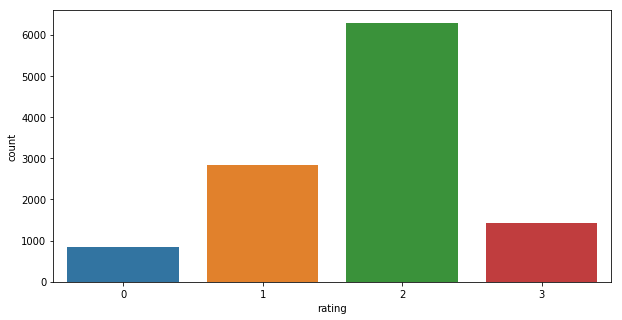

In [25]:
# Visualizing the rating class distribution
plt.figure(figsize = (10, 5))
sns.countplot(newdata["rating"])
plt.show()

In [26]:
# Creating a new dataset that has only customer reviews and restaurant ratings
reviews_data = newdata[["reviews_list", "rating"]]
# Examining the reviews for the first restaurant in the dataset
reviews_data["reviews_list"][0]
# The text needs cleaning up

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [27]:
# Converting all the text to lowercase
reviews_data["reviews_list"] = reviews_data["reviews_list"].apply(lambda x: x.lower())

# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+") 
# Applying the tokenizer to each row of the reviews
review_tokens = reviews_data["reviews_list"].apply(tokenizer.tokenize)
# Examining the tokens created for the first row / restaurant
print(review_tokens[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['rated', 'rated', 'n', 'a', 'beautiful', 'place', 'to', 'dine', 'in', 'the', 'interiors', 'take', 'you', 'back', 'to', 'the', 'mughal', 'era', 'the', 'lightings', 'are', 'just', 'perfect', 'we', 'went', 'there', 'on', 'the', 'occasion', 'of', 'christmas', 'and', 'so', 'they', 'had', 'only', 'limited', 'items', 'available', 'but', 'the', 'taste', 'and', 'service', 'was', 'not', 'compromised', 'at', 'all', 'the', 'only', 'complaint', 'is', 'that', 'the', 'breads', 'could', 'have', 'been', 'better', 'would', 'surely', 'like', 'to', 'come', 'here', 'again', 'rated', 'rated', 'n', 'i', 'was', 'here', 'for', 'dinner', 'with', 'my', 'family', 'on', 'a', 'weekday', 'the', 'restaurant', 'was', 'completely', 'empty', 'ambience', 'is', 'good', 'with', 'some', 'good', 'old', 'hindi', 'music', 'seating', 'arrangement', 'are', 'good', 'too', 'we', 'ordered', 'masala', 'papad', 'panner', 'and', 'baby', 'corn', 'starters', 'lemon', 'and', 'corrionder', 'soup', 'butter', 'roti', 'olive', 'and', 'chill

In [28]:
# Importing and examining the English stopwords directory 
# These are common words that typically don't add meaning to the text and can be removed
stop = stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x"])
# Removing stopwords from the tokens
review_tokens = review_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the reviews 
all_reviews = review_tokens.astype(str).str.cat()
cleaned_reviews = tokenizer.tokenize(all_reviews)

# Getting the frequency distribution of individual words in the reviews
fd = FreqDist()
for word in cleaned_reviews:
    fd[word] += 1
    
# Examining the top 5 most frequent words
fd.most_common(5)

[('good', 149748),
 ('food', 147055),
 ('place', 138133),
 ('chicken', 68081),
 ('ordered', 50312)]

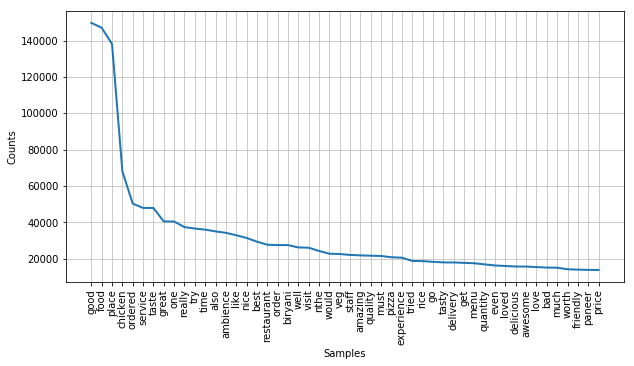

In [30]:
# Plotting the top 50 most frequent words
plt.figure(figsize = (10, 5))
fd.plot(50)
plt.show()

In [31]:
#Observations
#Of the 50 most frequent words across customer reviews, six reveal food preferences: chicken, biryani, veg, pizza, rice, paneer. The only negative word in the top 50 is "bad".

#Factors contributing to restaurant experience are mentioned in the following (descending) order of frequency: place > taste > service > time > ambience > staff > quality > delivery > menu > quantity > friendly.

#Now let us repeat the analysis on a bi-gram level. Bi-grams are pairs of words which can provide better context than individual words

In [32]:
# Generating bigrams from the reviews
bigrams = bigrams(cleaned_reviews)
# Getting the bigram frequency distribution
fd_bigrams = FreqDist()
for bigram in bigrams:
    fd_bigrams[bigram] += 1
# Examining the top 5 most frequent bigrams
fd_bigrams.most_common(5)

[(('must', 'try'), 10623),
 (('really', 'good'), 9943),
 (('good', 'food'), 9929),
 (('food', 'good'), 9606),
 (('good', 'place'), 7785)]

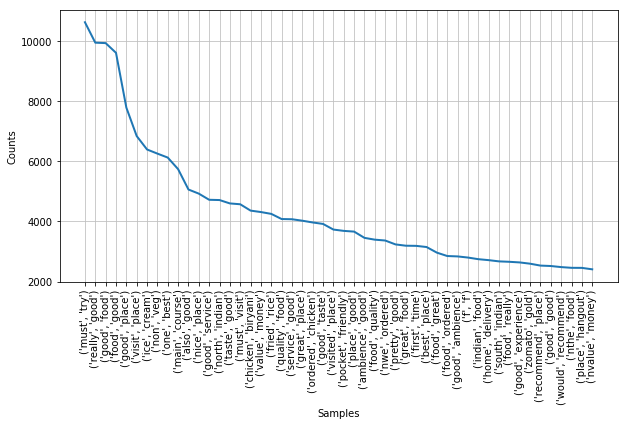

In [33]:
# Plotting the top 50 most frequent bigrams
plt.figure(figsize = (10, 5))
fd_bigrams.plot(50)
plt.show()


In [34]:
#Observations
#Food items/preferences mentioned in the top 50 bigrams are ice cream, non veg, North Indian, chicken biryani, fried rice, chicken and South Indian. Top six bigrams related to restaurant experience: good food > good place > good service > value (for) money > pocket friendly > ambience good. the expense factor, which was missed by individual word frequency counts, was picked up by the bigram frequency counts. Zomato might also be happy to know their membership program "Zomato Gold" is in the top 50 bigrams, with 2593 mentions in the customer reviews.

In [35]:
# Generating trigrams from the reviews
trigrams = trigrams(cleaned_reviews)

fd_trigrams = FreqDist()
for trigram in trigrams:
    fd_trigrams[trigram] += 1

fd_trigrams.most_common(5)

[(('xa', 'xa', 'xa'), 1975),
 (('north', 'indian', 'food'), 1686),
 (('must', 'visit', 'place'), 1685),
 (('f', 'f', 'f'), 1655),
 (('veg', 'non', 'veg'), 1633)]

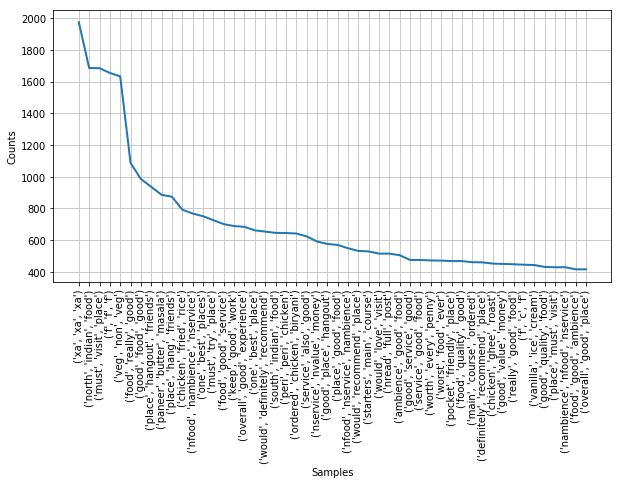

In [36]:
plt.figure(figsize = (10, 5))
fd_trigrams.plot(50)
plt.show()

In [37]:
#Observations
#There appears to be some bad data (strings of "xa xa xa") somewhere in the reviews.The specific food preferences we can see here are paneer butter masala, chicken fried rice, chicken biryani, peri peri chicken and chicken ghee roast On restaurant experience: a specific insight revealed by the trigrams is that many people are looking for places to hang out with their friends. We also see a variety of positive trigrams like "must visit place", "food really good", "service also good" and "worth every penny". However, there is only one negative trigram in the top 50 - "worst food ever".

In [39]:
# Creating a new dataset with cuisines info and restaurant ratings
cuisines = newdata[["cuisine", "rating"]]
cuisines["cuisine"] = cuisines["cuisine"].astype(str)
# Converting to lowercase
cuisines["cuisine"] = cuisines["cuisine"].apply(lambda x: x.lower())
# Tokenizing the cuisines
cuisine_tokens = cuisines["cuisine"].apply(tokenizer.tokenize)
# Concatenating all the cuisine names into one text document
all_cuisines = cuisine_tokens.astype(str).str.cat()
cleaned_cuisines = tokenizer.tokenize(all_cuisines)

# Generating cuisine frequencies 
fd_cuisine = FreqDist()
for cuisine in cleaned_cuisines:
    fd_cuisine[cuisine] += 1
    
# Printing the 50 most common cuisines (top 50)
print(fd_cuisine.most_common(50))

[('indian', 7279), ('north', 4933), ('chinese', 3522), ('food', 3099), ('south', 2335), ('fast', 2014), ('biryani', 1689), ('desserts', 1228), ('beverages', 1093), ('continental', 950), ('cafe', 738), ('street', 714), ('bakery', 685), ('italian', 547), ('andhra', 470), ('ice', 454), ('cream', 454), ('pizza', 415), ('burger', 394), ('rolls', 382), ('seafood', 366), ('mughlai', 363), ('kerala', 310), ('juices', 303), ('momos', 264), ('mithai', 262), ('kebab', 247), ('arabian', 245), ('american', 229), ('sandwich', 208), ('asian', 207), ('salad', 201), ('thai', 196), ('healthy', 185), ('finger', 182), ('bbq', 152), ('bengali', 139), ('mangalorean', 122), ('mexican', 107), ('european', 106), ('tea', 92), ('mediterranean', 88), ('hyderabadi', 87), ('steak', 79), ('tibetan', 60), ('japanese', 46), ('chettinad', 43), ('chicken', 41), ('eastern', 37), ('rajasthani', 35)]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [40]:
#Observations
#One must be careful when interpreting these lists. For example, "dogs" can't be a cuisine but the preceding word "hot" tells us that the cuisine is "hot dogs". Another tricky one is Cantonese, which comes under Chinese and so might not really be rare.